# Group01 - NLP Project
Group 1
B009 Anuj Shah
B015 Ayush Gupta
B024 Havisha Mehta
B038 Sayali Bhambure
B041 Shraiya Ranka

# Natural Language Processing

**NLP is the process of teaching computers to understand and manipulate human language, allowing them to perform tasks such as language translation, text summarization, sentiment analysis, speech recognition, and many more. NLP makes it possible for humans to communicate with computers in a more natural way, and for computers to interact with humans in a way that is more intuitive and personalized.**

# spaCy

spaCy is an open-source library for Natural Language Processing (NLP) in Python. It is designed to be fast, efficient, and easy to use, making it a popular choice for developers who need to process large amounts of text data.

The library comes with pre-trained models for various languages, which can be used to perform a wide range of NLP tasks such as tokenization, part-of-speech tagging, named entity recognition, dependency parsing, and more. These models are built using deep learning techniques, making them very accurate and robust.

In [1]:
import spacy
import numpy as np
import pandas as pd
from spacy.matcher import Matcher
import gensim
import gensim.corpora as corpora
import pyLDAvis
import matplotlib.pyplot as plt
import docx
from spacy import displacy
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Text Preprocessing

In [3]:
text_data=''

doc = docx.Document('progress towards Sustaianble devpt goals.docx')
for para in doc.paragraphs:
    if(len(para.text)>1):
        text_data = text_data + para.text
        text_data = text_data + '\n'

print(text_data)

Economic and Social Council	
2021 session
23 July 2020–22 July 2021
Agenda item 6
High-level political forum on sustainable development, convened under the auspices of the Economic and Social Council
Progress towards the Sustainable Development Goals
Report of the Secretary-General
Introduction
The year 2020 was an extraordinary time in human history. To date, the coronavirus disease (COVID-19) pandemic has cost over 3 million lives, devastated the global economy and upended all spheres of human life. Against this backdrop, the present report was prepared to provide an overview of progress towards the Sustainable Development Goals using inputs from more than 50 international and regional organizations. The data contained herein are derived from indicators in the global indicator framework developed by the Inter-Agency and Expert Group on Sustainable Development Goal Indicators and adopted by the General Assembly on 6 July 2017 (see resolution 71/313).1
Before the COVID-19 pandemic, pro

In [4]:
nlp = spacy.load('en_core_web_sm')
text_data=nlp(text_data)

In [5]:
doc=text_data
print(doc)

Economic and Social Council	
2021 session
23 July 2020–22 July 2021
Agenda item 6
High-level political forum on sustainable development, convened under the auspices of the Economic and Social Council
Progress towards the Sustainable Development Goals
Report of the Secretary-General
Introduction
The year 2020 was an extraordinary time in human history. To date, the coronavirus disease (COVID-19) pandemic has cost over 3 million lives, devastated the global economy and upended all spheres of human life. Against this backdrop, the present report was prepared to provide an overview of progress towards the Sustainable Development Goals using inputs from more than 50 international and regional organizations. The data contained herein are derived from indicators in the global indicator framework developed by the Inter-Agency and Expert Group on Sustainable Development Goal Indicators and adopted by the General Assembly on 6 July 2017 (see resolution 71/313).1
Before the COVID-19 pandemic, pro

In [6]:
type(doc)

spacy.tokens.doc.Doc

## Tokenization

Tokenization is the process of breaking down a text into individual words, phrases, symbols, or other meaningful elements, called tokens, in order to analyze or manipulate it.

In [7]:
cnt=0
for token in doc:
    print (token)
    cnt=cnt+1

Economic
and
Social
Council
	

2021
session


23
July
2020–22
July
2021


Agenda
item
6


High
-
level
political
forum
on
sustainable
development
,
convened
under
the
auspices
of
the
Economic
and
Social
Council


Progress
towards
the
Sustainable
Development
Goals


Report
of
the
Secretary
-
General


Introduction


The
year
2020
was
an
extraordinary
time
in
human
history
.
To
date
,
the
coronavirus
disease
(
COVID-19
)
pandemic
has
cost
over
3
million
lives
,
devastated
the
global
economy
and
upended
all
spheres
of
human
life
.
Against
this
backdrop
,
the
present
report
was
prepared
to
provide
an
overview
of
progress
towards
the
Sustainable
Development
Goals
using
inputs
from
more
than
50
international
and
regional
organizations
.
The
data
contained
herein
are
derived
from
indicators
in
the
global
indicator
framework
developed
by
the
Inter
-
Agency
and
Expert
Group
on
Sustainable
Development
Goal
Indicators
and
adopted
by
the
General
Assembly
on
6
July
2017
(
see
resolution
71/313).1



In [8]:
print(cnt)

19854


### Fetching relevant tokens

In [9]:
from spacy.lang.en.stop_words import STOP_WORDS

**Stop Words** are commonly used words in a language that are often removed from text data during Natural Language Processing (NLP) tasks because they do not carry significant meaning in the context of the analysis. These words are often the most common words in a language, such as "the", "and", "a", "an", "in", "of", and so on.

In [10]:
# Checking for STOP_WORDS

for token in doc:
    print(token,'==>',token.is_stop)

Economic ==> False
and ==> True
Social ==> False
Council ==> False
	
 ==> False
2021 ==> False
session ==> False

 ==> False
23 ==> False
July ==> False
2020–22 ==> False
July ==> False
2021 ==> False

 ==> False
Agenda ==> False
item ==> False
6 ==> False

 ==> False
High ==> False
- ==> False
level ==> False
political ==> False
forum ==> False
on ==> True
sustainable ==> False
development ==> False
, ==> False
convened ==> False
under ==> True
the ==> True
auspices ==> False
of ==> True
the ==> True
Economic ==> False
and ==> True
Social ==> False
Council ==> False

 ==> False
Progress ==> False
towards ==> True
the ==> True
Sustainable ==> False
Development ==> False
Goals ==> False

 ==> False
Report ==> False
of ==> True
the ==> True
Secretary ==> False
- ==> False
General ==> False

 ==> False
Introduction ==> False

 ==> False
The ==> True
year ==> False
2020 ==> False
was ==> True
an ==> True
extraordinary ==> False
time ==> False
in ==> True
human ==> False
history ==> False
.

fit ==> False
for ==> True

 ==> False
its ==> True
purpose ==> False
. ==> False
Confidence ==> False
in ==> True
the ==> True
justice ==> False
system ==> False
is ==> True
low ==> False
in ==> True
many ==> True
countries ==> False
: ==> False

 ==> False
“ ==> False
Slightly ==> False
more ==> True
than ==> True
50 ==> False
% ==> False
of ==> True
adults ==> False
across ==> True
123 ==> False
countries ==> False
surveyed ==> False
in ==> True
2013 ==> False

 ==> False
expressed ==> False
confidence ==> False
in ==> True
their ==> True
judicial ==> False
systems ==> False
and ==> True
courts ==> False
. ==> False
In ==> True
73 ==> False
of ==> True
these ==> True

 ==> False
countries ==> False
, ==> False
less ==> True
than ==> True
half ==> False
of ==> True
residents ==> False
are ==> True
confident ==> False
in ==> True
their ==> True
country ==> False
's ==> True

 ==> False
judicial ==> False
system ==> False
, ==> False
illustrating ==> False
the ==> True
importance ==> F

In [11]:
token_list=[]

for token in doc:
    if not token.is_stop and not token.is_punct and not token.like_num and not token.like_url and token.text!='\n' and token.text!='\t':
        token_list.append(token.lemma_)
        
print(token_list)

['economic', 'Social', 'Council', '\t\n', 'session', 'July', '2020–22', 'July', 'Agenda', 'item', 'high', 'level', 'political', 'forum', 'sustainable', 'development', 'convene', 'auspex', 'Economic', 'Social', 'Council', 'Progress', 'Sustainable', 'Development', 'goal', 'Report', 'Secretary', 'General', 'introduction', 'year', 'extraordinary', 'time', 'human', 'history', 'date', 'coronavirus', 'disease', 'COVID-19', 'pandemic', 'cost', 'life', 'devastate', 'global', 'economy', 'upend', 'sphere', 'human', 'life', 'backdrop', 'present', 'report', 'prepared', 'provide', 'overview', 'progress', 'Sustainable', 'Development', 'Goals', 'input', 'international', 'regional', 'organization', 'datum', 'contain', 'derive', 'indicator', 'global', 'indicator', 'framework', 'develop', 'Inter', 'Agency', 'Expert', 'Group', 'sustainable', 'Development', 'Goal', 'Indicators', 'adopt', 'General', 'Assembly', 'July', 'resolution', '71/313).1', 'covid-19', 'pandemic', 'progress', 'implement', 'goal', 'impo

In [12]:
len(token_list)

8502

In [13]:
df=pd.DataFrame(token_list,columns=['Token'])

In [14]:
df['Token'].value_counts().head(25)

country        196
territory      131
global          96
pandemic        96
increase        85
develop         61
people          60
datum           59
year            55
progress        46
woman           46
$               44
system          43
level           43
access          43
child           40
high            38
rate            37
justice         37
sustainable     37
report          36
world           36
average         35
total           34
area            34
Name: Token, dtype: int64

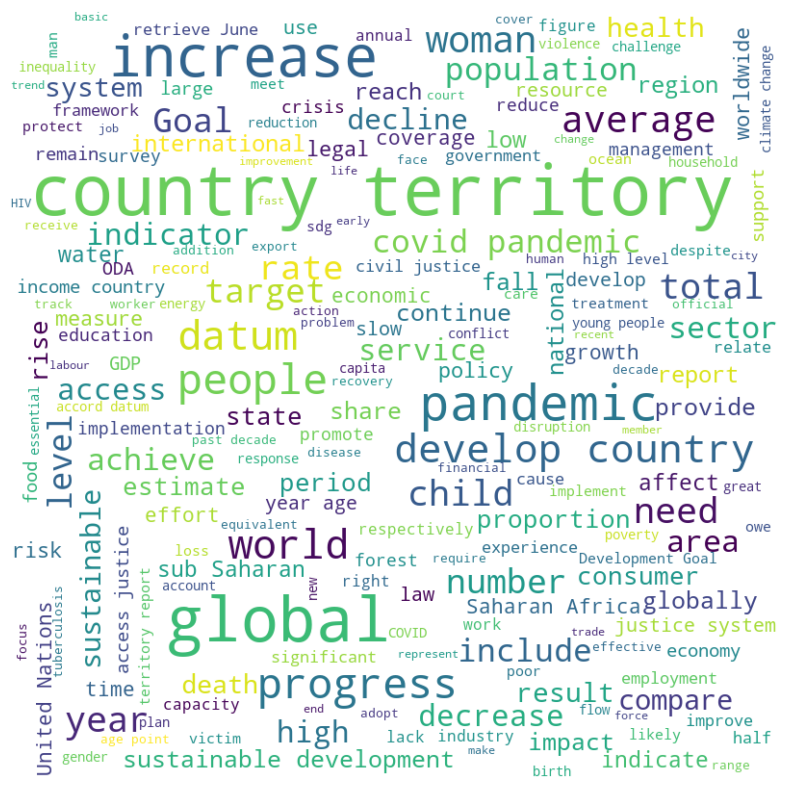

In [15]:
from wordcloud import WordCloud

# Define the word cloud parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)

# Generate the word cloud from the set of keywords
wordcloud.generate_from_text(' '.join(token_list))

# Visualize the word cloud
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

## POS Tagging

**Part-of-speech (POS) tagging** is the process of assigning a part of speech, such as noun, verb, adjective, or adverb, to each word in a text corpus. POS tagging is an important step in Natural Language Processing (NLP) because it provides a way to analyze the grammatical structure of a sentence, which can help in understanding the meaning and context of the text.

In [16]:
for token in doc:
    if not token.is_stop and not token.is_punct and not token.like_num and not token.like_url and token.text!='\n' and token.text!='\t':
        print(token,' --> ',token.pos_,'-',spacy.explain(token.pos_),' -->',token.tag_,'-',spacy.explain(token.tag_))

Economic  -->  ADJ - adjective  --> JJ - adjective (English), other noun-modifier (Chinese)
Social  -->  PROPN - proper noun  --> NNP - noun, proper singular
Council  -->  PROPN - proper noun  --> NNP - noun, proper singular
	
  -->  SPACE - space  --> _SP - whitespace
session  -->  NOUN - noun  --> NN - noun, singular or mass
July  -->  PROPN - proper noun  --> NNP - noun, proper singular
2020–22  -->  NOUN - noun  --> NN - noun, singular or mass
July  -->  PROPN - proper noun  --> NNP - noun, proper singular
Agenda  -->  PROPN - proper noun  --> NNP - noun, proper singular
item  -->  NOUN - noun  --> NN - noun, singular or mass
High  -->  ADJ - adjective  --> JJ - adjective (English), other noun-modifier (Chinese)
level  -->  NOUN - noun  --> NN - noun, singular or mass
political  -->  ADJ - adjective  --> JJ - adjective (English), other noun-modifier (Chinese)
forum  -->  NOUN - noun  --> NN - noun, singular or mass
sustainable  -->  ADJ - adjective  --> JJ - adjective (English), ot

In [17]:
cols=['Token','POS','Explain_POS','Tag','Explain_Tag']
cols

['Token', 'POS', 'Explain_POS', 'Tag', 'Explain_Tag']

In [18]:
rows=[]
for token in doc:
    if not token.is_stop and not token.is_punct and not token.like_num and not token.like_url and token.text!='\n' and token.text!='\t':
        row=token,token.pos_,spacy.explain(token.pos_),token.tag_,spacy.explain(token.tag_)
        rows.append(row)

In [19]:
token_df=pd.DataFrame(rows,columns=cols)
token_df.head(10)

,Token,POS,Explain_POS,Tag,Explain_Tag
0,Economic,ADJ,adjective,JJ,"adjective (English), other noun-modifier (Chin..."
1,Social,PROPN,proper noun,NNP,"noun, proper singular"
2,Council,PROPN,proper noun,NNP,"noun, proper singular"
3,\t\n,SPACE,space,_SP,whitespace
4,session,NOUN,noun,NN,"noun, singular or mass"
5,July,PROPN,proper noun,NNP,"noun, proper singular"
6,2020–22,NOUN,noun,NN,"noun, singular or mass"
7,July,PROPN,proper noun,NNP,"noun, proper singular"
8,Agenda,PROPN,proper noun,NNP,"noun, proper singular"
9,item,NOUN,noun,NN,"noun, singular or mass"


## Parser

**Parser** is a Natural Language Processing (NLP) tool that is used to analyze the grammatical structure of a sentence by identifying the relationships between the words and phrases in the sentence. The parser creates a parse tree or a dependency tree, which represents the syntactic structure of the sentence and the relationships between its components.

In [ ]:
options={'compact':'True','color':'blue',"width": 1200}


displacy.render(doc,style='dep',options=options)

## Noun Chunks

**Noun chunks** are phrases in a sentence that consist of a noun and the words that modify it, such as adjectives or prepositional phrases. Noun chunks are useful in Natural Language Processing (NLP) because they can provide information about the entities or objects being discussed in the text.

In [20]:
for chunk in doc.noun_chunks:
    print(chunk.text, '==>',chunk.label_,'==>',spacy.explain(chunk.label_))

Economic and Social Council	
2021 session ==> NP ==> noun phrase
Agenda item ==> NP ==> noun phrase
6
High-level political forum ==> NP ==> noun phrase
sustainable development ==> NP ==> noun phrase
the auspices ==> NP ==> noun phrase
the Economic and Social Council
Progress ==> NP ==> noun phrase
the Sustainable Development Goals
Report ==> NP ==> noun phrase
the Secretary-General
Introduction ==> NP ==> noun phrase
The year ==> NP ==> noun phrase
an extraordinary time ==> NP ==> noun phrase
human history ==> NP ==> noun phrase
date ==> NP ==> noun phrase
the coronavirus disease ==> NP ==> noun phrase
over 3 million lives ==> NP ==> noun phrase
the global economy ==> NP ==> noun phrase
all spheres ==> NP ==> noun phrase
human life ==> NP ==> noun phrase
this backdrop ==> NP ==> noun phrase
the present report ==> NP ==> noun phrase
an overview ==> NP ==> noun phrase
progress ==> NP ==> noun phrase
the Sustainable Development Goals ==> NP ==> noun phrase
inputs ==> NP ==> noun phrase
mo

## Named Entity Recognition

**Named Entity Recognition (NER)** focuses on identifying and categorizing entities mentioned in text into predefined categories such as people, organizations, locations, products, and so on.

The goal of NER is to automatically identify and extract specific entities from a text, and then classify them into the appropriate category.

In [21]:
for ent in doc.ents:
    print(ent.text,'==>',ent.label_)

Economic and Social Council ==> ORG
2021 ==> DATE
23 July 2020–22 ==> DATE
July 2021 ==> DATE
6 ==> CARDINAL
the Economic and Social Council
Progress ==> ORG
the Sustainable Development Goals
Report ==> ORG
The year 2020 ==> DATE
COVID-19 ==> ORG
over 3 million ==> CARDINAL
the Sustainable Development Goals ==> ORG
more than 50 ==> CARDINAL
the Inter-Agency ==> ORG
Expert Group on Sustainable ==> ORG
the General Assembly ==> ORG
6 July 2017 ==> DATE
COVID-19 ==> ORG
early 2020 ==> DATE
2030 ==> DATE
Goals ==> ORG
between 119 and 124 million ==> CARDINAL
2020 ==> DATE
2020 ==> DATE
255 million ==> CARDINAL
101 million ==> CARDINAL
the previous two decades ==> DATE
up to 10 million ==> CARDINAL
the next decade ==> DATE
2020 ==> CARDINAL
about 1.2 ==> CARDINAL
1.5 ==> CARDINAL
the Paris Agreement ==> EVENT
2020 ==> DATE
10 million ==> CARDINAL
each year ==> DATE
the period 2015–2020 ==> DATE
COVID-19 ==> ORG
FDI ==> ORG
40% ==> PERCENT
2019 ==> DATE
5.6% ==> PERCENT
2020 ==> DATE
2019 ==>

In [22]:
displacy.render(doc, style='ent')

In [23]:
ent_list=[]
for ent in doc.ents:
    ent_list.append(ent.label_)

In [24]:
Counter(ent_list)

Counter({'ORG': 198,
         'DATE': 571,
         'CARDINAL': 413,
         'EVENT': 3,
         'PERCENT': 287,
         'MONEY': 50,
         'GPE': 47,
         'ORDINAL': 13,
         'QUANTITY': 19,
         'LOC': 62,
         'FAC': 2,
         'NORP': 10,
         'TIME': 4,
         'PRODUCT': 5,
         'PERSON': 13,
         'LAW': 6,
         'WORK_OF_ART': 1})

**The most frequently occurring entity types are 'ORG' (198), 'DATE' (571), 'CARDINAL' (413), and 'PERCENT' (287), indicating that the speech contains a significant amount of information about organizations, dates, numbers, and percentages related to sustainability.**

**The appearance of 'MONEY' (50) suggests that the speech might discuss financial aspects of sustainability. 'GPE' (47) and 'LOC' (62) suggest that the speech may mention various locations, countries, or regions where sustainability efforts are taking place or could be implemented.**

**Other entity types such as 'PERSON' (13), 'NORP' (10), and 'LAW' (6) suggest that the speech also touches upon individuals, groups as well as laws and regulations related to the topic.**

## Rule based matching

**Rule-based matching** that involves defining a set of rules or patterns to extract information from text. The patterns are typically defined using regular expressions or spaCy's pattern syntax, and they can be used to match specific sequences of words or phrases in the text.

In [25]:
matcher_1=Matcher(nlp.vocab)

pattern_1=[{'text':'Sustainable'},{'text':'Development'}]

matcher_1.add('pattern_1',[pattern_1])

match_1= matcher_1(doc)

print(len(match_1))

12


In [26]:
for match_id,start,end in match_1:
    span=doc[start:end]
    print(span.text)

Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development
Sustainable Development


In [27]:
matcher_2=Matcher(nlp.vocab)

pattern_2=[{'text':'COVID-19'}]

matcher_2.add('Pattern2',[pattern_2])

match_2= matcher_2(doc)

print('Count of occurence of COVID-19 =',len(match_2))

Count of occurence of COVID-19 = 51


In [28]:
matcher_3=Matcher(nlp.vocab)

pattern_3=[{'text':'pollution'}]

matcher_3.add('Pattern3',[pattern_3])

match_3= matcher_3(doc)

print(len(match_3))

7


In [29]:
matcher_4=Matcher(nlp.vocab)

pattern_4=[{'LEMMA':
            {'IN':['pollution','waste','gas',
        'vehicle','population','poor','destruction']}}]

matcher_4.add('Pattern4',[pattern_4])

match_4=matcher_4(doc)

print('Count of words that hinder Sustainability =',len(match_4))

Count of words that hinder Sustainability = 56


In [30]:
matcher_5=Matcher(nlp.vocab)

pattern_5=[{"ENT_TYPE":'ORG'}]

matcher_5.add('Pattern10',[pattern_5])

match_5=matcher_5(doc)

print('Count of the entities mentioned =',len(match_5))

Count of the entities mentioned = 534


In [31]:
for match_id,start,end in match_5:
    span=doc[start:end]
    print(span.text)

Economic
and
Social
Council
the
Economic
and
Social
Council


Progress
the
Sustainable
Development
Goals


Report
COVID-19
the
Sustainable
Development
Goals
the
Inter
-
Agency
Expert
Group
on
Sustainable
the
General
Assembly
COVID-19
Goals
COVID-19
FDI
the
Global
Sustainable
Development
Goals
Indicators
Database
https://unstats.un.org/sdgs/.


Development
COVID-19
COVID-19
COVID-19
the
Global
Sustainable
Development
Goal
Indicators
Database
the
United
Nations
World
Data
Forum
COVID-19
COVID-19
COVID-19
COVID-19
the
Sendai
Framework
for
Disaster
Risk
Reduction
2015
–
2030
the
Framework
for
Action
the
Development
Assistance
Committee
COVID-19
Globally
COVID-19
the
World
Trade
Organization
WTO
WTO
COVID-19
COVID-19
COVID-19
COVID-19
the
World
Health
Organization
COVID-19
COVID-19
COVID-19
COVID-19
ODA
The
Global
Fund
the
Gavi
Alliance
COVID-19
COVID-19
COVID-19
United
Nations
COVID-19
ODA
The
European
Union
COVID-19
COVID-19
COVID-19
COVID-19
ODA
COVID-19
COVID-19
COVID-19
the
Internation

In [32]:
matcher_6=Matcher(nlp.vocab)

pattern_6=[{"ENT_TYPE":'GPE'}]

matcher_6.add('Pattern6',[pattern_6])

match_6=matcher_6(doc)

print('Count of Geo Political Entities mentioned =',len(match_6))

Count of Geo Political Entities mentioned = 59


In [33]:
for match_id,start,end in match_6:
    span=doc[start:end]
    print(span.text)

Governments
Northern
Africa
Oceania
Australia
New
Zealand
Tuberculosis
Malaria
the
United
States
of
America
France
Japan
Saudi
Arabia
Turkey
Brazil
China
India
Indonesia
Pakistan
States
Washington
D.C.
Australia
New
Zealand
Australia
New
Zealand
States
States
States
States
Australia
New
Zealand
States
States
Northern
Africa
States
States
Northern
Africa
pangolin
States
https://unstats.un.org/sdgs/indicators/indicators-list/.
Balmer
London
Guidelines
HMSO
UK
UK
States
States


## Vectorisation of Tokens

**Vectorization of tokens** refers to the process of converting words or text into numerical vectors that can be processed by machine learning algorithms. In natural language processing, words or text are often represented as vectors in order to perform various tasks, such as text classification, clustering, or information retrieval.

First, each word in the text is assigned a unique numerical ID, known as a token. Then, the tokens are transformed into numerical vectors using various techniques such as **Bag of Words** or Word2Vec.

In the Bag of Words approach, each word is represented by a vector that indicates its frequency of occurrence in the text. This method creates a sparse vector, meaning that most of the elements in the vector are zero.

Once the text has been transformed into vectors, machine learning algorithms can be used to analyze and classify the text.

In [34]:
goal1='''Goal 1. End poverty in all its forms everywhere.The slowdown in progress on poverty reduction since 2015 has been further set back by the COVID-19 pandemic, with the global rate of extreme poverty rising in2020 for the first time in over 20 years. The triple threat of COVID-19, conflict andclimate change makes the global goal of ending poverty by 2030 unachievable unlessimmediate and substantial policy actions are taken. The COVID-19 crisis hasdemonstrated the importance of social protection systems for protecting health,employment and income, with many new social protection measures introduced in2020 as a result. However, 4 billion people worldwide are still without any socialprotection, most of whom are poor and vulnerable..Compounding the threats to poverty eradication posed by climate change andconflict, the pandemic is set to increase the number of poor people in 2020 by between119 and 124 million, causing the extreme poverty rate to rise for the first time in aE/2021/584/27 21-05814generation, from 8.4 per cent in 2019 to 9.5 per cent in 2020 according to “nowcasts”.Of the “new poor”, 8 out of 10 are in middle-income countries and territories. It ispredicted that around 600 million people will still be living in extreme poverty by 2030..Before the pandemic, global extreme poverty had fallen from 10.1 per cent in2015 to 9.3 per cent in 2017, equivalent to 689 million people living on less than$1.90 a day. However, the rate of decrease had slowed to less than half a percentagepoint annually in that period, compared to around 1 percentage point annuallybetween 1990 and 2015.The share of workers around the world living in extreme poverty fell from 14 percent in 2010 to 7.8 per cent in 2015 and 6.6 per cent in 2019, although progress foryoung workers was less encouraging. However, the pandemic has severely affectedthe informal economy, in which the vast majority of the working poor are employed.The crisis also has had a disproportionate impact on the livelihoods of young andfemale workers, who are already much more likely to be living in poverty. In 2019,young people were twice as likely as adults to be among the working poor.By 2020, only 47 per cent of the global population was covered effectively byat least one social protection cash benefit, leaving 4 billion people unprotected.However, between 1 February and 31 December 2020, governments of 209 countriesand territories announced more than 1,600 mostly short-term social protectionmeasures in response to the COVID-19 crisis.In 2019, 12,000 disaster fatalities were reported across 72 reporting countriesand territories. This is a significant reduction on the figure for 2018, when disastermortality reported by 105 countries and territories reached a total of 125,000, and isin line with the overall trend in mortality that has been declining since 2005. On thebasis of the latest reports submitted as part of the monitoring process under the SendaiFramework for Disaster Risk Reduction 2015–2030, direct economic losses of$9.3 billion were reported for 2019 by 67 countries and territories, of which 68 percent or $6.4 billion was recorded for the agricultural sector.Only 30 per cent of all countries and territories with data for the period 2015 –2018 spent between 15 and 20 per cent of total government expenditure on education,as recommended in the Framework for Action for the implementation of SustainableDevelopment Goal 4.Total ODA grants for basic social services and development food aid, which areintended for poverty reduction, represented 0.02 per cent of the gross national incomeof donors to the Development Assistance Committee in 2019.'''

In [35]:
goal2='''Goal 2. End hunger, achieve food security and improved nutrition
and promote sustainable agriculture.Even before the COVID-19 pandemic, the number of people experiencing
hunger globally and suffering from food insecurity had been rising gradually since
2014. The pandemic has increased the vulnerabilities and inadequacies of global food
systems, potentially leaving hundreds of millions more people chronically
undernourished and making the goal of ending hunger more difficult to achieve.
Between 83 and 132 million more people may already have been pushed into chronic
hunger in 2020. In addition, countries and territories around the world continue to
struggle with multiple forms of malnutrition.
It is estimated that almost 690 million people around the world experienced
hunger in 2019, equivalent to 8.9 per cent of the world population – an increase of
nearly 60 million in five years. Updated estimates due for publication in July 2021
will provide a more recent picture of the effects of the pandemic on hunger.
An estimated 2 billion people, 25.9 per cent of the world population, were
affected by moderate or severe food insecurity in 2019, up from 22.4 per cent in 2015.
The fastest rise was recorded in Latin America and the Caribbean, although the
highest levels were registered in sub-Saharan Africa.
Globally, 149.2 million children under the age of 5, some 22 per cent of all
children, suffer from stunting (low height for age) according to the latest estimates
available for 2020,2
a decrease from 24.4 per cent in 2015. However, these figures
may rise as a result of continued constraints on access to nutritious food and essential
nutrition services during the pandemic, the full impact of which may take years to
manifest.
In 2020,2 wasting (low weight for height) and overweight affected 6.7 per cent
(45.4 million) and 5.7 per cent (38.9 million) of children under the age of 5,
respectively. Wasting will be one of the conditions most affected by the pandemic in
the short term: around 15 per cent more children than estimated may have suffered
from wasting as a result of a decline in household wealth and disruptions in the
availability and affordability of nutritious food and essential nutrition services.
Childhood overweight (high weight for height) may also rise in some countries and
territories where unhealthy foods replaced fresh, nutritious foodstuffs and restrictions
on movement constrained opportunities for physical activity for long periods.
In women, anaemia increases the risk of adverse maternal and neonatal
outcomes. In 2019, the global prevalence of anaemia was 29.9 per cent in women of
reproductive age, 29.6 per cent in non-pregnant women and 36.5 per cent in pregnant
women. The prevalence was higher in Central and Southern Asia, at 47.5 per cent in
women of reproductive age.
The average agricultural output per labour day of small-scale food producers in
the limited number of countries and territories surveyed is lower than that of large -
scale producers, who also earn up to two or three times the annual income of smallscale producers. 
In almost all countries and territories surveyed, households headed
by males achieve higher labour productivity and earn larger annual incomes compared
to their female counterparts.
Global holdings of plant genetic resources for food and agriculture in 2020
reached 5.7 million accessions conserved in 831 gene banks by 114 countries and
territories and 17 regional and international research centres. Although the total
number of global holdings has risen, the growth rate decreased over the past 10 years,
reaching its lowest level in 2020.
The world is still far off target for maintaining the genetic diversity of farmed
and domesticated animals, either in the field or in gene banks. The risk status of 61 per
cent of local livestock breeds remains unknown. Of the limited number surveyed,
74 per cent are deemed to be at risk of extinction, yet there is only sufficient material
in gene banks for 203 out of a global total of 7,700 local livestock breeds to
reconstitute the breed in the event of its extinction.
While the share of agricultural aid has remained constant at about 5 p er cent, it
has more than doubled in volume since 2002, with total disbursements amounting to
$13 billion in 2019.
A steady downward trend has been observed in export subsidy outlays notified
to the World Trade Organization (WTO). Total notified annual outlays fell from a
peak of $6.7 billion in 1999 to $138 million in 2018. In December 2015, WTO
members adopted the ministerial decision on export competition, formally agreeing
to eliminate all forms of agricultural export subsidy entitlements.
At the global level, the number of countries and territories afflicted by high food
prices decreased from 2014 to 2019, with the notable exception of some countries in
Central, Southern and Western Asia as well as Northern Africa, owing to the reduced
domestic availability of staple foods and to currency depreciations.'''

In [36]:
goal3='''Goal 3. Ensure healthy lives and promote well-being for all at
all ages.Before the COVID-19 pandemic, progress had been made in many health areas,
including improving the health of mothers and children, increasing immunization
coverage and reducing the incidence of communicable diseases, albeit not fast enough
to meet the Goal 3 targets by 2030. The disruption caused by the pandemic has now
halted progress and even reversed some gains made. According to a recent survey,
substantial disruptions persist more than a year into the pandemic, with about 90 per
cent of countries and territories still reporting one or more disruptions to essential
health services. Among the health services most extensively affected are those for
mental, neurological and substance use disorders; neglected tropical diseases;
tuberculosis; HIV and hepatitis B and C; cancer screening; services for other
non-communicable diseases, including hypertension and diabetes; family planning
and contraception; urgent dental care; malnutrition; immunization; and malaria.
Reproductive, maternal and child health
According to data from the period 2014–2020, 83 per cent of births worldwide
were assisted by skilled health professionals, including medical doctors, nurses and
midwives, an increase from 71 per cent in the period from 2007 to 2013. The COVID-19
pandemic may reverse gains in skilled childbirth care coverage and disrupt maternity
health services.
The world has made substantial progress towards the goal of ending preventable
child deaths, with the global under-5 mortality rate decreasing from 76 to 38 deaths
per 1,000 live births between 2000 and 2019. The global neonatal mortality rate fell
from 30 deaths to 17 per 1,000 live births in the same period. Even with such progress,
5.2 million children died in 2019 before reaching their fifth birthday, with almost half
of those deaths, 2.4 million, occurring in the first month of life. While the full impact
of the pandemic on child survival is not yet known, significant disruption to the
continued provision of life-saving interventions could stall or even reverse the
progress made.
The proportion of women of reproductive age (15 to 49 years) who have their
family planning needs met by modern contraceptive methods has remained steady at
around 77 per cent between 2015 and 2021, reaching only 56 per cent in sub -Saharan
Africa and 52 per cent in Oceania, excluding Australia and New Zealand. The ongoing
pandemic may lead to reductions in these figures as a result of supply-chain
disruptions and decreased access to family planning services, while the fertility
intentions and family planning needs among women of reproductive age may also
change.
The global adolescent birth rate has fallen from 56 births per 1,000 adolescent
women 15 to 19 years of age in 2000 to 45 births per 1,000 adolescents in 2015 and
41 per 1,000 in 2020. The declines varied considerably across regions, with the largest
decrease in Central and Southern Asia from 70 births per 1,000 adolescents in 2000
to 24 births per 1,000 in 2020.
Infectious diseases
While the rate of new HIV infections declined from 0.48 infections pe r 1,000
uninfected population among adults (15 to 49 years of age) to 0.37 per 1,000 between
2010 and 2019, it remained far higher than the global target for 2020. The largest
decrease was in sub-Saharan Africa, the region with the highest numbers of people
living with HIV. Major inequalities remain in access to HIV prevention, testing and
treatment services across regions, countries, and sub-populations within countries.
There is evidence to suggest that the COVID-19 pandemic has caused considerable
disruption to HIV services, including testing, initiation of treatment, voluntary
medical male circumcision and pre-exposure prophylaxis.
In 2019, an estimated 10 million people fell ill with tuberculosis, of whom
56 per cent were adult men, 32 per cent adult women, 12 per cent children and 8.2 per
cent people living with HIV, making it the leading cause of death from a single
infectious agent. Globally, the incidence of tuberculosis fell from 174 new and relapse
cases per 100,000 population in 2000 to 130 cases per 100,000 in 2019, a 25 per cent
decline over the period, with the tuberculosis mortality rate among HIV-negative
people falling by 45 per cent in the same period. Although the disease burden is
decreasing, large gaps in detection and treatment persist, and the current pace of
progress is not fast enough to meet the target of ending tuberculosis by 2030. Drug -
resistant tuberculosis is a continuing threat: in 2019, there were 465,000 new cases
with resistance to rifampicin, the most effective first-line drug, and 78 per cent of
those infected with tuberculosis had a multidrug-resistant strain. As a result of the
COVID-19 pandemic, an estimated 1.4 million fewer people received necessary care
for tuberculosis during 2020 compared with the previous year, a reduction in
treatment levels of 21 per cent.
Between 2015 and 2019, the incidence of malaria plateaued at around 57 cases
per 1,000 people at risk. The target of the World Health Organization for reductions
in malaria case incidence in 2020 will be missed by 37 per cent. In 2019, there were
a total of 229 million malaria cases worldwide, with the disease claiming some
409,000 lives. Gaps in funding and in access to life-saving tools are undermining
global efforts to curb the disease, and the COVID-19 pandemic is expected to set the
fight back even further.
The use of the hepatitis B vaccine in infants has reduced the incidence of new
chronic hepatitis B infections considerably. The proportion of children under 5 years
of age who became chronically infected fell from 4.7 per cent in the pre-vaccination
era to 0.9 per cent in 2020. Worldwide, the 2020 target of 1 per cent seroprevalence
in children under 5 years of age has been met. Additional efforts for increasing
coverage are needed to achieve the Goal target of 0.1 per cent seroprevalence by 2030.
In 2019, 1.74 billion people were reported to have required mass or individual
treatment and care for neglected tropical diseases, down from 2.19 billion in 2010
and 12 million fewer than the figure reported for 2018. The lower number of people
requiring interventions is largely the result of having eliminated at least one neglected
tropical disease in 42 countries and territories since 2010.
Non-communicable diseases, mental health and environmental risks
Globally, 74 per cent of all deaths in 2019 were caused by non-communicable
diseases. The probability of dying from any of the four main non-communicable
diseases (cardiovascular disease, cancer, diabetes or chronic respiratory disease)
between 30 and 70 years of age decreased from 19.9 per cent in 2010 to 17.8 per cent
in 2019. The rate of decline is insufficient to meet the Goal target. The COVID-19
pandemic has underscored the need for further attention to interventions in
non-communicable diseases, as people with underlying non-communicable diseases
are at higher risk of severe illness and death from the COVID-19 virus.
About 700,000 suicide deaths occurred in 2019. The global suicide death rate
declined by 29 per cent, from 13 deaths per 100,000 population in 2000 to 9.2 deaths
per 100,000 in 2019.
In 2019, global alcohol consumption was 5.8 litres of pure alcohol per person
15 years of age or older, a 5 per cent decrease from 6.1 litres in 2010.
The global rate of mortality from road traffic injuries fell by 8.3 per cent, from
18.1 deaths per 100,000 population in 2010 to 16.7 deaths per 100,000 in 2019.
Nevertheless, 1.3 million people worldwide died in road traffic accidents in 2019,
75 per cent of whom were boys and men. Low-income countries and territories had
lower rates of vehicle ownership than in high-income countries and territories, yet a
death rate more than 3.5 times higher. Road traffic injuries were the leading cause of
death among young people 15 to 29 years of age worldwide.
The global prevalence of tobacco uses among men declined from 50 per cent in
2000 to 38.6 per cent in 2018, and among women from 16.7 per cent in 2000 to 8.5 per
cent in 2018. Even so, the number of people dying from a tobacco-related illness was
estimated to be more than 8.1 million in 2017.
Unintentional poisonings were responsible for more than 84,000 deaths in 2019.
Although the number of such deaths has steadily declined since 2000, mortality rates
continue to be relatively high in low-income countries and territories, where they are
more than twice the global average. One third of all deaths from unintentional
poisonings occurred in sub-Saharan Africa.
Health systems and funding
Immunization is one of the world’s most successful and cost-effective health
interventions. While vaccination coverage among infants increased from 72 per cent
in 2000 to 85 per cent in 2015 before stalling until 2019, an estimated 19.7 million
children did not receive essential vaccines during the first year of th eir life in 2019.
In addition, global coverage levels for the pneumococcal conjugate vaccine, which
has the potential to significantly reduce the incidence of pneumonia, have yet to reach
50 per cent. Measles is a highly contagious disease, and the 71 per cent coverage of
the two-dose vaccine in 2019 was insufficient to prevent outbreaks of measles.
Improvements in essential health services, as measured by the universal health
coverage service coverage index, increased from a global average of 45 out of 100 in
the year 2000 to 66 in 2017. Low-income countries and territories experienced the
greatest progress, driven mainly by interventions for infectious diseases. However,
the pace of progress has slowed since 2010, and the poorest countries and territories
and those affected by conflict are generally lagging furthest behind. The COVID-19
pandemic is derailing progress even further.
Before the pandemic, an estimated 927 million people, or 12.7 per cent of the
global population, made out-of-pocket health-care payments amounting to more than
10 per cent of their household budgets, and for 209 million people, or 3 per cent, their
share of health-care spending exceeded 25 per cent of their household budgets, posing
an even greater threat to spending on other essential goods and services such as food
and education.
ODA for basic health from all official donors has increased by 59 per cent in
real terms since 2010, reaching $11 billion in 2019. The Global Fund to Fight AIDS,
Tuberculosis and Malaria, the Gavi Alliance and the United States of America
accounted for more than half of that total, providing $2.4 billion, $1.9 billion and
$1.8 billion, respectively. In 2019, $3.4 billion was spent on basic health care,
$2.2 billion on infectious disease control, excluding HIV/AIDS, and $2.2 billion on
malaria control.
Health workers are on the front line of the COVID-19 pandemic response.
Countries and territories, especially those with a limited health workforce, are further
constrained with regard to the delivery of essential health services. On the basis of
data from the period 2013–2018, the density of nursing and midwifery personnel in
Northern America is more than 150 per 10,000 population, which is more than 15 times
that in sub-Saharan African and 8 times that in Northern Africa and Southern Asia.
The density of medical doctors in Northern America, Oceania and Central Asia
remains around 25 per 10,000 population, compared to 2 per 10,000 population in
sub-Saharan African.'''

In [37]:
goal4='''Goal 4. Ensure inclusive and equitable quality education and
promote lifelong learning opportunities for all.The impact of the COVID-19 pandemic on schooling is a “generational
catastrophe”.Before the pandemic, progress was already slow and insufficient to
achieve the education targets in the Goals. School closures caused by the pandemic
have had devastating consequences for children’s learning and well-being. Hundreds
of millions of children and young people are falling behind in their learning, which
will have long-term impacts. One year into the COVID-19 crisis, two thirds of
students worldwide are still affected by full or partial school closures. The most
vulnerable children and those unable to access remote learning are at increased risk
of never returning to school and of being forced into child marriage or child labour.
It is estimated that 101 million additional children and young people (from
grades 1 to 8) fell below the minimum reading proficiency level in 2020 owing to the
consequences of the pandemic, which wiped out the education gains achieved over
the past 20 years. Reading proficiency levels could recover by 2024, but only if
exceptional efforts are devoted to the task through remedial and catch-up strategies.
Just before the pandemic, 53 per cent of young people were completing
secondary school globally, although the figure for sub-Saharan Africa was only 29 per
cent. The rise in school completion rates may slow or even reverse depending on the
duration of school closures, which are resulting in learning losses and affecting the
motivation to attend school, and on the extent to which poverty might increase, adding
to the obstacles faced by disadvantaged children.
Data from before the pandemic for 76 mostly low- and middle-income countries
and territories covering the period 2012–2020 indicate that 7 in 10 children who are
3 and 4 years of age are on track developmentally, with no significant differences
between the sexes. However, many young children are unable to attend early
education because of the pandemic and so are now entirely reliant on their caregivers
for nurturing care. Unsafe conditions, negative interactions with caregivers and a lack
of educational opportunities during the early years can lead to irreversible outcomes,
affecting children’s potential for the remainder of their lives.
3 United Nations, “Education during COVID-19 and beyond”, policy brief, August 2020.
The rate of participation in organized learning one year before the official age
of entry into primary education rose steadily in the years before the pandemic, from
65 per cent in 2010 to 73 per cent in 2019, but with variation among countries and
territories ranging from 12 per cent to nearly 100 per cent. Gender parity has been
achieved in every region. The progress made over past years has been at risk since
2020 because early education facilities and primary schools closed in most countries
and territories, preventing or limiting access to education, especially for children from
low- and middle-income countries and territories.
Disparities in access to education and learning outcomes persist across a range
of education indicators. For example, there were still only 92 literate women and girls
15 years of age or older for every 100 literate boys and men of the same ag e range in
2019. Almost half of countries and territories with recent data did not achieve gender
parity in primary completion, and only a handful of countries and territories demonstrate
parity in tertiary enrolment ratios. Disparities by urban/rural geographical location
and household wealth are typically more extreme, with one third and one sixth of
countries and territories achieving parity in primary completion, respectively, and no
countries or territories with recent data achieving parity in tertiary attendance. The
pandemic is expected to lead to a reversal in recent progress towards equity. With the
shift towards remote learning, those from the poorest households and other vulnerable
groups are less equipped to participate and more likely to drop out permanently or for
extended periods.
According to data for the period from 2017 to 2019, more than one fifth of
primary schools worldwide do not have access to basic drinking water, and more than
one third lack basic handwashing facilities. In the least developed countries, more
than two thirds of primary schools do not have access to electricity, with even lower
rates of Internet access and computer availability for pedagogical purposes in schools.
ODA for scholarships amounted to $1.7 billion in 2019, up from $1.3 billion in
2017. The European Union, France, Japan, Saudi Arabia and Turkey accounted for
55 per cent of this total.
In 2019, 81 per cent of primary school teachers were trained, although that
proportion was lower in sub-Saharan Africa (65 per cent) and Southern Asia (74 per
cent). With the unprecedented lockdown as a result of the pandemic leading to total
or partial school closures in most countries and territories, the teaching workforce
was severely affected.'''

In [38]:
goal5='''Goal 5. Achieve gender equality and empower all women and girls.The socioeconomic impacts of the COVID-19 pandemic have adversely affected
recent progress on gender equality: violence against women and girls has intensified,
child marriage is expected to increase after declining in previous years, and increased
care work at home is affecting women disproportionately. The pandemic has
highlighted the need for swift action to address the gender inequality that remains
pervasive globally and to get back on track for achieving gender equality. Women
have played a critical role in the response to the pandemic as front-line health
workers, caregivers, and managers and leaders of the response and recovery efforts.
However, they remain underrepresented in critical leadership positions, and their
rights and priorities are often not explicitly addressed in those efforts. The crisis
presents an opportunity to reshape and rebuild systems, laws, policies and institutions
in order to advance gender equality.
Discriminatory laws and legal gaps continue to prevent women from fully
enjoying their human rights. According to data for 2020 from 95 countries and
territories, more than half lacked quotas for women in the national parliament; 83 per
cent included budgetary commitments to implement legislation addressing violence
against women, although 63 per cent continued to lack rape laws based on the
principle of consent; more than 90 per cent prohibited discrimination in employment
on the basis of gender, yet almost half continued to restrict women from working in
certain jobs or industries; and almost one quarter did not grant women equal rights to
men for entering into marriage and initiating divorce proceedings.
New estimates based on surveys from the period 2000–2018 confirm that nearly
736 million women, or one in three, have been subjected to physical violence, sexual
violence or both by a husband or intimate partner, or sexual violence by a non-partner,
at least once in their lifetime from 15 years of age – a figure that has remained largely
unchanged over the past decade. Intimate partner violence starts early, with nearly
24 per cent of adolescent girls 15 to 19 years of age and 26 per cent of young women
20 to 24 years of age who have ever had a partner or been married having experienced
such violence already.
Over the past decade, the practice of child marriage has declined significantly,
with the global proportion of young women who were married as children decreasing
by 15 per cent, from nearly one in four in 2010 to one in five in 2020. As a result of
this progress, the child marriages of some 25 million girls have been averted.
However, the profound effects of the pandemic are threatening this progress, with up
to 10 million additional girls at risk of child marriage in the next decade as a result of
the pandemic.
According to data from 31 countries and territories in which the practice is
concentrated, at least 200 million women and girls have been subjected to female
genital mutilation. Despite some progress, there are still countries and territories in
which at least 9 in 10 girls and women ranging from 15 to 49 years of age have been
subjected to such mutilation, making the harmful practice almost universal.
The latest data collected on 90 countries and territories between 2001 and 2019
indicate that, on an average day, women spend about 2.5 times as many hours as men
on unpaid domestic work and care work.
As at 1 January 2021, data from 135 countries and territories indicated that the
global average proportion of women in the single or lower houses of parliaments had
reached 25.6 per cent, continuing a slow upward trend that would require 40 years for
gender parity to be achieved, while the proportion of women in local deliberative
bodies was 36.3 per cent. There are 40 per cent or more women in the lower or single
parliamentary houses of only 23 countries and territories and in the local governments
of only 22 countries and territories, proportions achieved through the use of gender
quotas in most of the countries and territories.
By 2019, women accounted for nearly 39 per cent of the global labour force,
but held only 28.3 per cent of managerial positions, a rise of 3 percentage points since
2000. The disproportionate impact of the pandemic on women in the workforce, and
female entrepreneurs in particular, threatens to roll back the little progress made in
reducing the global gender gap in managerial positions.
Data for 2020 from 36 countries and territories on national legal framework
guarantees for women’s equal rights to land ownership show that substantial
improvement has been achieved in establishing equal inheritance rights (69 per cent)
and establishing spousal consent requirements for land transactions (61 per cent),
while progress is lagging in areas including land registration, customary law, and
women’s representation in land governance.
Empowering more women with mobile telephones has been shown to accelerate
social and economic development. However, in the 66 countries and territories with data
for the period 2017–2019, average mobile telephone ownership was 8.5 percentage
points lower for women than for men.
In 2018, 81 per cent of the 69 countries and territories for which there are data
needed to improve their systems for tracking budget allocations for gender equality.
In the context of the COVID-19 pandemic, strengthening these systems through the
comprehensive use of gender-budgeting tools will contribute to the better targeting of
resources for a gender-responsive recovery.'''

In [39]:
goal6='''Goal 6. Ensure availability and sustainable management of water
and sanitation for all. Billions of people worldwide still live without safely managed drinking-water,
sanitation and hygiene services, which are critical for protecting human health and
containing the spread of the COVID-19 virus. Over the past century, global water use
has increased at more than twice the rate of population growth. In addition to water
stress, countries and territories are facing growing challenges linked to water
pollution, degraded water-related ecosystems, water scarcity caused by climate
change, and a lack of cooperation on transboundary waters. The world is not on track
to achieve Goal 6. A dramatic acceleration is needed in the current rates of progress
and in integrated and holistic approaches to water management.
Between 2000 and 2020, the global population using safely managed drinkingwater and 
sanitation services increased by 2 billion and 2.4 billion, respectively.
Despite the progress, 2 billion people lacked safely managed drinking-water services,
3.6 billion safely managed sanitation services and 2.3 billion basic hygiene services
in 2020. One in three people worldwide still lack basic handwashing facilities with
soap and water at home, leaving them especially vulnerable to the COVID-19 virus. 
Among the 42 countries and territories reporting on total wastewater generation
and treatment in 2015, 32 per cent of wastewater flows were subject to some form of
treatment. An estimated 56 per cent of wastewater generated by households in 2020
was safely treated, according to data from 128 countries and territories.
An assessment of rivers, lakes and aquifers of 89 countries and territories in
2020 indicates that the water quality of 72 per cent of the water bodies assessed is
good. Protection is easier than restoration, so efforts to protect these water bodies
from pollution must be initiated now.
Improving water use efficiency is a key measure that can contribute to reducing
water stress in a country. Global efficiency increased from $17.30 per m3
in 2015 to $19 per m3 in 2018, a 10 per cent increase. All economic sectors have experienced an
increase in water use efficiency since 2015, with increases of 15 per cent in the
industrial sector, 8 per cent in the agricultural sector and 8 per cent in the services
sector.
In 2018, global water stress was estimated to be 18.4 per cent, an increase from
18.2 per cent in 2015. Regions such as Western and Southern Asia and Northern
Africa present very high levels of water stress at more than 70 per cent, while SouthEastern Asia, 
Latin America and the Caribbean, and sub-Saharan Africa saw their
water stress levels increase from 2017 to 2018.
In 2020, 129 countries and territories were not on track to meet the target for
implementing integrated water resources management by 2030, which includes
financing and intersectoral coordination mechanisms, basin management and
monitoring. The rate of implementation needs to double globally. In many countries
and territories, the COVID-19 pandemic has led to wider stakeholder engagement in
water resources management through online consultations.
Advancing transboundary water cooperation plays a crucial role in preventing
conflicts and supporting wider regional integration, peace and sustainable
development. However, according to data from 2017 and 2020, only 24 of the
153 countries and territories that share transboundary rivers, lakes and aquifers have
100 per cent of their transboundary basin area covered by operational arrangements,
and only another 22 countries and territories have more than 70 per cent covered.
Freshwater ecosystems and the multitude of resources that they provide are
changing dramatically. One fifth of the world’s river basins are experiencing rapid
increases or decreases in surface water area. This unprecedented situation is
compounded by pollution in large lakes and the persistent loss and degradation of
wetlands and freshwater biodiversity. Between 1970 and 2015, the total area of inland
and marine or coastal wetlands declined by approximately 35 per cent, three times the
rate of forest loss. Existing efforts to protect and restore water-related ecosystems
must be scaled up and accelerated urgently.
From 2015 to 2019, ODA disbursements to the water sector remained stable at
around $8.8 billion, while ODA commitments to the water sector rose by 9 per cent.
In the same period, concessional lending for the least developed countries increased
by 52 per cent to $2 billion, with ODA grants to those countries increasing by only
8 per cent.
In 2018 and 2019, two thirds of the 109 reporting countries and territories had
procedures for the participation of local communities in water and sanitation
management that were defined in laws or policies. However, only 14 countries and
territories reported high levels of community and user participation in collaborative
management and decision-making.'''

In [40]:
goal7='''Goal 7. Ensure access to affordable, reliable, sustainable and
modern energy for all.Despite significant progress over the past decade on improving access to
electricity, increasing renewable energy use in the electricity sector and improving
energy efficiency, the world is still falling short in providing affordable, reliable,
sustainable and modern energy for all. Clean and sustainable energy should be at the
heart of the COVID-19 response and of efforts to combat climate change.
Global access to electricity increased from 83 per cent in 2010 to 90 per cent in
2019, with an increase in average annual electrification of 0.876 percentage points.
The global access deficit decreased from 1.22 billion in 2010 to 759 million in 2019.
Despite the significant effort made, there may still be as many as 660 million people
without access worldwide in 2030. In addition, the COVID-19 pandemic will impede
progress on future electrification.
In 2019, 66 per cent of the global population had access to clean cooking fuels
and technologies. For the period 2010–2019, most of the increases in such access
occurred in the most populous low- and middle-income countries and territories:
Brazil, China, India, Indonesia and Pakistan. People reliant on polluting fuels and
technologies are exposed to high levels of household air pollution with serious
consequences for their cardiovascular and respiratory systems, increasing their
vulnerability to diseases including the COVID-19 virus.
The share of renewable energy in total final energy consumption increased
gradually from 16.4 per cent in 2010 to 17.1 per cent in 2018. However, the share of
modern renewable sources in total final energy consumption rose by only
2.5 percentage points in a decade, remaining below 11 per cent in 2018. The pandemic
is having a mixed impact on renewable energy development across end-use sectors:
global electricity demand declined by 2 per cent in 2020 compared to 2019, but the
use of renewables for power generation increased by almost 7 per cent year on year.
Global primary energy intensity increased from 5.6 megajoules per dollar of
gross domestic product (GDP) in 2010 to 4.8 megajoules in 2018, an average annual
rate of improvement of 2 per cent. While early estimates for 2019 also indicate an
improvement of 2 per cent, the outlook for 2020 suggests a rate of only 0.8 per cent
because of the pandemic. Annual improvement until 2030 will need to average 3 per
cent if the Goal 7.3 target is to be met.
International financial flows to developing countries in support of clean and
renewable energy reached $14 billion in 2018, 35 per cent lower than in 2017 but
32 per cent higher than in 2010. Hydropower projects received 27 per cent of flows
in 2018, while projects relating to solar received 26 per cent, geothermal 8 per cent,
wind 5 per cent and multiple or other renewable energies 34 per cent.
Developing countries had a renewable energy capacity of 219 watts per capita
at the end of 2019, an increase of 7 per cent over the year but slightly less than the
8.8 per cent expansion in per capita capacity for 2018. Per capita hydropower capacity
remained stable in 2019, as total capacity increased in line with population growth
during the year at approximately 0.4 per cent. Solar and wind capacities both
expanded much faster than population growth, leading to increases in per capita
capacity of 22.2 and 11.3 per cent, respectively.'''

In [41]:
goal8='''Goal 8. Promote sustained, inclusive and sustainable economic
growth, full and productive employment and decent work for all.Before the start of the COVID-19 pandemic in 2020, the average growth of the
global economy had already slowed. The pandemic has caused the worst global
economic recession since the Great Depression and has had a massive impact on
working times and incomes. In 2020, 8.8 per cent of global working hours were lost
compared to the figure for the fourth quarter of 2019, which is equivalent to
255 million full-time jobs and approximately four times greater than the hours lost
during the global financial crisis in 2009. Young people and women in the workforce
were hit particularly hard by the crisis in the labour market. The global economy is
slowly recovering, although activity may remain below pre-pandemic levels for a
prolonged period.
Following average growth of about 2 per cent from 2014 to 2018, global real
GDP per capita increased by only 1.3 per cent in 2019 and is estimated to have
declined by 5.3 per cent in 2020 owing to the pandemic. Global real GDP per capita
is projected to increase again by 3.6 per cent in 2021 and 2.6 per cent in 2022.
The real GDP of the least developed countries increased by 4.8 per cent in 2019
and is estimated to have fallen by 1.3 per cent in 2020 because of the disruption caused
by the pandemic.
Before the onset of the pandemic, informal employment accounted for 60.2 per
cent of global employment, equivalent to 2 billion people with informal jobs
characterized by a lack of basic protection, including social protection coverage.
More than three quarters, 1.6 billion informal workers, were significantly affected by
the pandemic-related lockdown measures or were working in the sectors hardest hit.
They are at high risk of falling into poverty and will experience greater challenges in
regaining their livelihoods during the recovery.
The median gender pay gap in countries and territories with data from around
2017 is close to 12 per cent, indicating that women’s hourly earnings are an average
of 12 per cent lower than those of men in half of all countries and territories with
data. However, this gender pay gap is an approximate calculation based on average
hourly earnings without controlling for sector, occupation, educational level or work
experience. In a global study, the International Labour Organization identified a
factor-weighted gender pay gap of 19 per cent. In 87 per cent of countries and
territories with recent data, professionals earn more than double that of workers in
elementary occupations per hour on average.
96. Global unemployment increased by 33 million in 2020, with the unemployment
rate increasing by 1.1 percentage points to 6.5 per cent. However, unemployment
figures reflect only a small proportion of the jobs lost as a result of the pandemic. A
further 81 million people were not actively seeking employment or were simply
unable to find employment owing to the COVID-19-related restrictions. Young people
and women were particularly hard hit by the crisis, with employment losses in 2020
of 8.7 and 5 per cent, respectively, compared to 3.7 per cent for all adults and 3.9 per
cent for men.
In 2019, more than one in five of the world’s young people were not in
employment, education or training, a proportion almost unchanged since 2005.
Quarterly figures indicate that the rate increased from the fourth quarter of 2019 to
the second quarter of 2020 in 42 out of 49 countries and territories with data. As
young women were already twice as likely as young men not to be in employment,
education or training, and as women have been forced into inactivity disproportionately
during the pandemic, the COVID-19 crisis is likely to worsen the gender gap among
young people not in employment, education or training.
The level of national compliance with the fundamental labour rights of freedom
of association and collective bargaining changed little between 2015 and 2018.
Global GDP from tourism increased at a higher rate than the rest of the economy
over the decade preceding 2019 to account for 4.1 per cent of global GDP in 2019,
compared to 3.7 per cent in 2008. However, as one of the sectors hardest hit by the
pandemic, a reversal in this trend is expected for 2020 and the coming years. Globally,
international arrivals decreased by 74 per cent in 2020 compared to 2019, which
represents a loss of $1.3 trillion in inbound tourism expenditure, more than 11 times
the loss resulting from the 2009 global crisis. An estimated 100 to 120 million tourism
jobs are at risk because of the pandemic, with a disproportionate effect on women.
While the tourism sectors of virtually all countries and territories in the world are
affected, the small island developing States suffer most acutely.
Globally, the number of automated teller machines per 100,000 adults rose by
more than 50 per cent during the past decade, from 45 in 2010 to 69 in 2019. However,
there was a slight reversal in the trend for commercial bank branches, with the number
of branches in 2019 marginally lower than that recorded in 2010.
In 2019, aid for trade commitments decreased by 6 per cent to $53 billion on the
basis of current prices. The sectors most represented were energy (27.9 per cent of
total aid for trade), transport and storage (22.6 per cent) and agriculture (17.8 per cent).
In 2020, almost one third of the 107 countries and territories with data had
formulated and operationalized a youth employment strategy, while 44 (41.1 per cent)
had such strategies but did not provide conclusive evidence of their implementation,
and just under one quarter (24.3 per cent) were in the process of developing a strategy.'''

In [42]:
goal9='''Goal 9. Build resilient infrastructure, promote inclusive and
sustainable industrialization and foster innovation.In the year before the COVID-19 pandemic triggered the greatest economic
crisis in decades, manufacturing value added had seen the slowest year-on-year
growth rate since 2012, primarily because of tariff and trade tensions between the
most dominant economies. The pandemic has hit the manufacturing and transport
industries hard, causing job losses and declining incomes for workers in those sectors.
The crisis poses unprecedented challenges for global value chains by disrupting both
the supply of and the demand for goods. Small-scale industries have been severely
affected, and many continue to face existential challenges. However, the COVID-19
crisis also offers opportunities to foster industrialization and bring groundbreaking
technologies to developing countries.
According to data from 2018 and 2019 on the 25 countries and territories in
Africa, Asia, South America, Central Asia and the Middle East for which the Rural
Access Index of the World Bank was updated using a spatial method, almost
300 million out of 520 million rural dwellers still lack reliable access to roads.
Growth in maritime freight volumes and global container port traffic weakened
in 2019, expanding at the marginal rates of 0.5 and 2 per cent, respectively, compared
to 2018. As a result of the COVID-19 pandemic, the volume of international maritime
freight is expected to have fallen by 4.1 per cent and global container port traffic by
2.1 per cent in 2020.
The pandemic affected manufacturing by disrupting global value chains and
restricting the movement of people and goods, resulting in a significant drop of
8.4 per cent in manufacturing production in 2020. The global share of manufacturing
value added in GDP fell from 16.5 per cent in 2019 to 15.9 per cent in 2020.
Manufacturing in the least developed countries is expected to have grown by a
negligible 1.2 per cent in 2020, compared to 8.7 per cent in 2019, helping the least
developed countries to increase their share of manufacturing value added to 12.8 per
cent in 2020 from 10.1 per cent in 2010. However, the growth rate is too slow to meet
the target of doubling the share of industry in GDP by 2030. Manufacturing value
added per capita in 2020 was only $135 in the least developed countries, compared
to $4,194 in Europe and Northern America.
In 2019, 13.7 per cent of global workers, or 454 million people, were employed
in manufacturing, one of the sectors hardest hit by the pandemic. Across 49 countries
and territories with data, manufacturing employment declined by an average of
5.6 and 2.5 per cent in the second and third quarters of 2020, respectively, compared
to the same periods in 2019.
Small-scale industries have been significantly affected by the pandemic, and
many continue to face existential challenges. According to survey data for the period
from 2006 to 2020, 29.3 per cent of small-scale entrepreneurs benefited from loans
or lines of credit before the crisis, with some regional differences. Only 15.7 per cent
of small-scale industries in sub-Saharan Africa received those forms of credit,
compared to 44 per cent in Latin America and the Caribbean.
Global carbon dioxide emissions from fuel combustion declined slightly in 2019
from a historic high of 33.5 billion tons in 2018, owing mainly to changes in power
sources in advanced economies and milder weather conditions across the continents.
Global carbon dioxide emissions from manufacturing continued their decline since
2014 and accounted for 5.9 billion tons in 2018. Although the world experienced a
remarkable drop in carbon dioxide emissions as a result of national lockdowns and
travel restrictions in 2020, most economies are likely to resume their usual levels of
carbon dioxide emissions as soon as the lockdown measures are lifted.
The proportion of global GDP invested in research and development rose at a
satisfactory pace, from 1.61 per cent in 2010 to 1.73 per cent in 2018. However,
countries and territories in most of the developing regions fell short of the world
average, some spending less than 1 per cent of GDP on research and development.
Globally, there has been an increase in the number of researchers per million
population from 1,022 in 2010 to 1,235 in 2018, ranging from 3,847 in Europe and
Northern America to only 99 in sub-Saharan Africa. In addition, women represented
only 30.5 per cent of global researchers in 2018.
Total official flows for economic infrastructure in developing countries reached
$63.6 billion in 2019, an increase of 39.6 per cent in real terms since 2010. The main
sectors assisted were transport ($21.3 billion), and banking and financial services
($15.3 billion).
In 2018, the share of medium- and high-technology manufacturing in total
manufacturing was 49 per cent in developed regions and 41.4 per cent in developing
regions, compared to only 8.9 per cent in the least developed countries. The pandemic
affected different industries unequally. Medium- and high-technology industries, such
as the pharmaceutical, computer, electronics and automotive sectors, have recovered
faster from the crisis than industries involving a lower technological intensity.
The roll-out of mobile broadband networks slowed in 2020. Almost 85 per cent
of the global population was covered by a 4G network at the end of 2020, following
a twofold increase in coverage since 2015. However, annual growth has been slowing
gradually since 2017, with the result that coverage in 2020 was only 1.3 percentage
points higher than in 2019'''

In [43]:
goal10='''Goal 10. Reduce inequality within and among countries.
Before the pandemic, modest gains had been made in the reduction of inequality
in certain areas, for example, reducing income inequality in some countries and
territories, continuing preferential trade status for lower-income countries and
territories and decreasing transaction costs for remittances. However, inequality
persists, whether in relation to income, wealth, opportunity or other dimensions. The
pandemic is exacerbating existing inequalities within and among countries and
territories and hitting the most vulnerable people and the poorest countries and
territories hardest, and is likely to delay the progress of the poorest countries and
territories on the Goals by a full 10 years. Globally, the number of refugees reached
its highest level on record in 2020. Even with strict COVID-19-related restrictions on
mobility around the world, thousands of migrants died on their migratory journey.
According to estimates of the International Monetary Fund, the COVID-19
pandemic would increase the average Gini index for emerging market and developing
economies by more than 6 per cent, with an even larger impact predicted for lowincome countries and territories.4
Data from 44 countries and territories for the period 2014–2020 show that
almost one in five people reported having personally experienced discrimination on
at least one of the grounds prohibited under international human rights law. Moreover,
women were more likely to be victims of discrimination than men. The health and
socioeconomic situations of many groups already experiencing higher levels of
discrimination have been further affected by the pandemic.
The data from 2019 on financial soundness indicators indicated some
improvement of overall loan performance, while the levels of capital, which is the
main buffer for absorbing losses, remained high despite a slight decline. The share of
countries and territories reporting non-performing loans whose value exceeds 5 per
cent of total loans declined from 41.9 per cent in 2018 to 39.5 per cent in 2019.
Meanwhile, the share of countries and territories reporting a ratio of total regulatory
capital to risk weighted assets of more than 15 per cent declined from 84.6 per cent
in 2018 to 82.1 per cent in 2019, although the median rose from 17.9 per cent to
18.2 per cent over the same period.
In 2020, 4,186 deaths and disappearances were recorded along migratory routes
worldwide, with an increase in fatalities on some routes. Despite the pandemic and
mobility restrictions at borders across the world, tens of thousands of people continued
to leave their homes and embark on dangerous journeys across deserts and seas.
By mid-2020, the number of people who had fled their countries and territories
and become refugees owing to war, conflict, persecution, human rights violations and
events seriously disturbing public order had grown to 24 million, the highest number
on record. The number of refugees outside their country of origin has risen to 307 out
of every 100,000 persons, more than double the figure at the end of 2010.
Globally, in 2019, 54 per cent of the 111 Governments with data reported having
instituted a comprehensive set of policy measures to facilitate orderly, safe, regular
and responsible migration and mobility of people, which means that they have
reported having policy measures in place for at least 80 per cent of the subcategories
that make up the six policy domains of this indicator. The degree to which the policy
measures were reported, however, varies widely across policy domains, with most
countries and territories reporting measures for cooperation and partnerships and for
safe, orderly and regular migration, and fewest countries and territories reporting
measures for migrant rights and for socioeconomic well-being.
From 2017 to 2020, the proportion of products exported by the least developed
countries and developing countries that receive duty-free treatment has remained
unchanged at 66 and 52 per cent, respectively.
In 2019, total resource flows for development to developing countries from
Development Assistance Committee donors, multilateral agencies and other key
providers amounted to $400 billion, of which $164 billion was ODA.
The average global cost of sending a $200 remittance decreased from 9.3 per
cent in 2011 to 6.5 per cent in 2020, bringing it closer to the interna'''

In [44]:
goal11='''Goal 11. Make cities and human settlements inclusive, safe,
resilient and sustainable.Before the pandemic, cities had rising numbers of slum dwellers, worsening air
pollution, minimal open public spaces and limited convenient access to public
transport. The direct and indirect impacts of the COVID-19 pandemic are making it
even more unlikely that this Goal will be achieved, with more people forced to live
in slums, where quality of life is deteriorating and vulnerability increasing.
The number of slum dwellers has continued to grow over the years, exceeding
1 billion in 2018. Slum dwellers are most prevalent in the three regions of Eastern
and South-Eastern Asia (370 million), sub-Saharan Africa (238 million) and Central
and Southern Asia (226 million).
According to data from 2019 for 610 cities in 95 countries and territories, about
half of the urban population has convenient access to public transport, defined as
living within a walking distance of 500 metres to low-capacity transport systems, such
as buses or trams, and 1,000 metres to high-capacity systems, such as trains and
ferries. As a result of the COVID-19 response measures imposed in countries and
territories throughout 2020, access to public transport in cities worldwide was
significantly disrupted, from partial closures and reduced capacities to total closure
of networks.
Data collected for a sample of 911 cities from 114 countries and territories in
2020 indicate that between 1990 and 2019, spatial urbanization occurred at a much
faster rate than population growth, and smaller cities were being urbanized more
quickly than their larger counterparts. On average, all regions except sub-Saharan
Africa and Eastern and South-Eastern Asia recorded a consistent increase in built-up
area per capita, with the highest values in Australia and New Zealand.
Data on a sample of 911 cities from 114 countries and territories indicate that
the share of urban area allocated to streets and open public spaces averaged only about
16 per cent globally in 2020, well below the allocation recommended by United
Nations Human Settlements Programme (UN-Habitat) of 30 per cent for streets and
an additional 10 to 15 per cent for open public spaces.
As of March 2021, 156 countries and territories have developed national urban
policies, almost half of which are already at the implementation stage. Of these
countries and territories, 38 per cent are in the early stages of plan development, while
13 per cent are monitoring and evaluating the performance of their plans.'''

In [45]:
goal12='''Goal 12. Ensure sustainable consumption and production patterns
For decades, scientists have been explaining the ways in which humanity is
driving the three planetary crises of climate, biodiversity and pollution, all of which
are linked to unsustainable production and consumption. Changes in consumption and
production patterns can help to promote the decoupling of economic growth and
human well-being from resource use and environmental impact. They can also trigger
the transformations envisaged in global commitments on biodiversity, the climate,
and sustainable development in general. The COVID-19 pandemic provides a window
of opportunity for exploring more inclusive and equitable development models that
are underpinned by sustainable consumption and production.
From 2017 to 2020, 83 countries, territories and the European Union shared
information on their contribution to the implementation of the 10-Year Framework of
Programmes on Sustainable Consumption and Production Patterns. In 2020, 136 policies
and 27 implementation activities were reported, bringing the total number to over
700. While specific actions have been taken to improve resource use efficiency in a
specific industry or area, this has not resulted in their widespread adoption across
sectors and industries.
Data indicate a rise of almost 40 per cent in the global material footprint per
capita, from 8.8 metric tons in 2000 to 12.2 metric tons in 2017. Similarly, domestic
material consumption per capita increased by more than 40 per cent, from 8.7 metric
tons in 2000 to 12.2 metric tons in 2017.
Although limited data are available, as of 2016, almost 14 per cent of food
produced globally was lost before reaching the retail sector. Estimates vary across
regions, from 20.7 per cent in Central and Southern Asia to 5.8 per cent in Australia
and New Zealand.
In 2019, the amount of e-waste generated was 7.3 kg per capita, with only
1.7 kg per capita documented to be managed in an environmentally sustainable
manner. E-waste generation is expected to grow by 0.16 kg per capita annually to
reach 9 kg per capita in 2030. The annual rate of growth in e-waste recycling over the
past decade was 0.05 kg per capita, which will need to increase more than tenfold if
all e-waste is to be recycled by 2030.
A pilot review conducted in 2020 on a random sample of about 4,000 companies
in the United Nations Global Compact database and the Sustainability Disclosure
database of the Global Reporting Initiative indicates that 85 per cent of companies
reported on minimum requirements for sustainability issues and 40 per cent on
advanced requirements for such issues.
As of December 2020, 40 countries and territories had reported on sustainable
public procurement policies and action plans or equivalent legal dispositions aimed
at encouraging the procurement of environmentally sound, energy-efficient products
and promoting more socially responsible purchasing practices and sustainable supply
chains.
Fossil fuel subsidies declined in 2019 to $431.6 billion as a result of lower fuel
prices, reversing the upward trend from 2017 to 2018. Fossil fuel subsidies are
expected to fall sharply owing to the collapse in demand caused by COVID-19
mitigation efforts and the oil price shock experienced in 2020.'''

In [46]:
goal13='''Goal 13. Take urgent action to combat climate change and
its impacts
Atmospheric concentrations of the major greenhouse gases continued to increase
despite the temporary reduction in emissions in 2020 related to measures taken in
response to the COVID-19 pandemic. The six years from 2015 to 2020 are likely to
be the warmest on record. Climate change is making the achievement of many Goals
less likely. To limit global warming to 1.5°C above pre-industrial levels in accordance
with the Paris Agreement, the world would need to achieve net zero carbon dioxide
emissions by around 2050.
As of April 2020, 118 countries and territories had reported the development
and adoption of national or local disaster risk reduction strategies, an increase from
48 countries and territories in the first year of the Sendai Framework.
As at 31 December 2020, 190 parties (189 countries and territories plus the
European Union) had communicated their first nationally determined contribution to
the United Nations Framework Convention on Climate Change, of which 44 were
least developed countries and 40 were small island developing States. A further
48 countries and territories, of which one is a least developed country and five are
small island developing States, have also communicated a second or updated
nationally determined contribution. Of these 48 countries and territories, 39 included
adaptation information in their new or updated contribution. The nationally
determined contributions demonstrate that countries and territories are articulating
more quantified targets and indicators for adaptation and identifying links between
adaptation, the Goals and other frameworks.
As at 31 March 2021, 125 of 154 developing countries were carrying out
measures for national adaptation plans and prioritizing the formulation and
implementation of the plans in their adaptation efforts. Moreover, six least developed
countries (including three small island developing States) and another four small
island developing States have completed a national adaptation plan. Further least
developed countries have draft national adaptation plans and are on track to complete
and submit these with a view to ensuring that all least developed countries have
national adaptation plans by 2021.
According to scientists, global emissions should be cut to 45 per cent below
2010 levels by 2030 in order to limit global warming to 1.5°C above pre -industrial
levels. Emissions from developed countries were approximately 6.2 per cent lower in
2019 than in 2010, while emissions from 70 developing countries rose by 14.4 per
cent in 2014.
Total climate finance reported by States parties included in annex I to the
Framework Convention on Climate Change continues to increase, reaching an annual
average of $48.7 billion in the period 2017–2018. This represents an increase of
10 per cent compared to the 2015–2016 period. While more than half of all climatespecific financial 
support in the 2017 and 2018 was targeted at mitigation action, the
share of adaptation support is growing, and many countries and territories are
prioritizing adaptation in their financial support provision.'''

In [47]:
goal14='''Goal 14. Conserve and sustainably use the oceans, seas and marine
resources for sustainable development
More than 3 billion people rely on the oceans for their livelihoods, and more
than 80 per cent of world merchandise trade by volume is carried by sea. The oceans,
seas and marine resources are under constant threat from pollution, warming and
acidification that are disrupting marine ecosystems and the communities they support.
These changes have long-term repercussions that require the world to urgently scale
up the protection of marine environments, investment in ocean science, support for
small-scale fishery communities, and the sustainable management of the oceans.
While efforts to reduce nutrient inputs into coastal zones are showing success
in some regions, algal blooms indicate that coastal eutrophication continues to be a
challenge. Globally, anomalies of chlorophyll-a (the pigment responsible for
photosynthesis in all plants and algae) in national exclusive economic zones
decreased by 20 per cent from 2018 to 2020.
Ocean acidification is caused by the absorption of atmospheric carbon dioxide
by the ocean, resulting in a decreasing pH and threatening marine organisms and
ocean-based services. A limited set of long-term observation sites in the open ocean
have observed a continuous decline in pH over the past 20 to 30 years.
Mean protected area coverage of marine key biodiversity areas increased
globally from 28 per cent in 2000 to 44 per cent in 2020. However, there is
considerable geographical variation in this progress, with coverage still less than one
quarter of key biodiversity areas in Oceania (excluding Australia and New Zealand).
Improved regulation, together with effective monitoring and surveillance, has
proved successful in restoring overfished stocks to biologically sustainable levels.
However, the adoption of such measures has generally been slow, in many developing
countries in particular. In 13 countries and territories that have active assessment and
management systems in place, the proportion of fish stocks within biologically
sustainable levels is higher than the world average of 65.8 per cent, according to data
collected in 2019.
Between 2018 and 2020, the average degree of implementation of international
instruments to combat illegal, unreported and unregulated fishing improved around
the world, with the global score measuring the implementation of the five principal
instruments rising from 3 to 4 out of 5. Almost 75 per cent of States scored highly in
their degree of implementation in 2020, compared to 70 per cent percent of States in
2018.
Between 2018 and 2020, the world made progress in implementing regulatory
and institutional frameworks that recognize and protect access rights for small-scale
fisheries, with the global score rising from 3 to 4. At the regional level, Northern
Africa and Western Asia made this progress, while the regional score for Central and
Southern Asia fell from 3 to 2, highlighting the need for efforts there to be redoubled
and demonstrating that there is no room for complacency.
Sustainable fisheries accounted for approximately 0.1 per cent of global GDP in
2017, while contributing more than 0.5 per cent of GDP in certain regions and the
least developed countries. The sustainable management of fish stocks remains critical
to ensuring that fisheries continue to generate economic growth and support equitable
development. The long-term impact of the COVID-19 pandemic on fisheries poses
significant challenges that threaten to undermine sustainable stock management and
profitability.
On average, only 1.2 per cent of national research budgets was allocated to
ocean science between 2013 and 2017, with amounts ranging from 0.02 per cent to
9.5 per cent. This is a small proportion in view of the conservatively estimated
$1.5 trillion contribution of the ocean to the global economy in 2010.
155. Many States have ratified or acceded to the United Nations Convention on the
Law of the Sea (168 parties) and its implementing agreements (150 parties for the
Agreement relating to the implementation of Part XI of the United Nations
Convention on the Law of the Sea and 91 parties for the United Nations Fish Stocks
Agreement). A number of States have implemented these instruments through legal,
policy and institutional frameworks, but further progress is needed in some
developing countries, in particular the least developed countries.'''

In [48]:
goal15='''Goal 15. Protect, restore and promote sustainable use of terrestrial
ecosystems, sustainably manage forests, combat desertification,
and halt and reverse land degradation and halt biodiversity loss
Deforestation and forest degradation, continued biodiversity loss and the
ongoing degradation of ecosystems are having profound consequences for human
well-being and survival. The world fell short on 2020 targets to halt biodiversity loss.
The COVID-19 pandemic has shown that, by threatening biodiversity, humanity
threatens its own survival. While great efforts are being made to expand sustainable
forest management, increase coverage of key biodiversity areas and sign up to
legislation and treaties for protecting biodiversity and ecosystems, much more needs
to be done to put the health of the planet at the centre of all plans and policies.
While the rate of deforestation in tropical regions has slowed in the past decad e,
vigilance and targeted efforts are required to maintain this trend. The proportion of
forest area fell from 31.9 per cent of total land area in 2000 to 31.2 per cent in 2020,
representing a net loss of almost 100 million hectares of the world’s forests. From
2000 to 2020, forest area increased in Asia, Europe and Northern America, but
decreased significantly in Latin America and sub-Saharan Africa. Despite the losses
in forest cover, above-ground forest biomass per hectare, the proportion of forest area
in protected areas and under long-term management plans, and certified forest area
all increased or remained stable at the global level and in most of the regions of the
world, demonstrating global progress towards sustainable forest management.
In 2020, an average of 43 per cent of each terrestrial key biodiversity area, 42 per
cent of each freshwater key biodiversity area, and 41 per cent of each mountain key
biodiversity area were within protected areas, an increase of 13 to14 percentage points
since 2000.
As of February 2021, 127 countries and territories had committed to setting
voluntary targets for achieving land degradation neutrality, and 68 countries and
territories had already officially endorsed their targets. Overall, commitments to la nd
restoration are estimated to amount to 1 billion hectares, of which 450 million
hectares are covered by commitments through land degradation neutrality targets.
Data based on satellite imagery reveal that green coverage (forests, grasslands,
croplands and wetlands) of the world’s mountains remained steady at about 73 per
cent between 2000 and 2018. Green cover tends to be greater in mountain areas that
are less than 2,500 metres above sea level. However, mountain green cover varies
considerably across geographical regions, ranging from 100 per cent in Oceania to
68 per cent in Northern Africa and Western Asia.
Globally, the risk of species extinction has increased by about 10 per cent over
the past three decades. The Red List Index, which ranges from a value of 1 to indicate
no risk of extinction to a value of 0 to indicate the extinction of all species, decreased
from 0.81 in 1993 to 0.73 in 2021.
As at 1 February 2021, 128 countries, territories and the European Union had
ratified the Nagoya Protocol on Access to Genetic Resources and the Fair and
Equitable Sharing of Benefits Arising from their Utilization to the Convention on
Biological Diversity, which is an increase of 60 countries and territories since 2016,
and 67 countries, territories and the European Union have shared information on their
Nagoya Protocol frameworks. There are now 148 parties to the International Treaty
on Plant Genetic Resources for Food and Agriculture, and so far, 57 countries and
territories have provided information about the measures that they have taken to
implement the Nagoya Protocol.
The pandemic and the vast subsequent harm to human and economic well-being
have starkly illustrated the potential global impact of zoonotic diseases, for which
wildlife trade – both legal and illegal – is a potential vector. While certain markets
for illegal wildlife products are declining, such as the market for ivory, which has
decreased 3.5-fold since 2013, other species are under increasing threat as offenders
shift their focus to more lucrative products, such as pangolin scales. In 2018, for
example, there was a tenfold increase in the number of whole pangolin equivalents
seized since 2014.
Nearly all countries and territories (98 per cent) have adopted national
legislation for the prevention or control of invasive alien species, although there is
wide variation in its coverage across sectors. The proportion of countries and
territories aligning their targets for invasive alien species with global targets has
increased, from 74 per cent in 2016 to 84 per cent in 2020.
As of March 2021, 89 countries and territories have implemented the system of
environmental economic accounting, an increase of 29 per cent since 2017. Of these,
62 countries and territories (70 per cent) have integrated the system of accounting
into their regular statistical production methods, and compile and publish the accounts
on a regular basis.
In 2019, ODA from Development Assistance Committee members provided in
support of biodiversity amounted to $6.6 billion, a decrease of 14 per cent in real
terms compared to 2018. In 2021, a total of 232 biodiversity-relevant taxes are in
force across 62 countries and territories.'''

In [49]:
goal16='''Goal 16. Promote peaceful and inclusive societies for sustainable
development, provide access to justice for all and build effective,
accountable and inclusive institutions at all levels
The world is still a long way from achieving the goal of building peaceful, just
and inclusive societies, with millions of people living in fragile and conflict-affected
States. At the end of 2019, 79.5 million people had been forcibly displaced
worldwide, equivalent to 1 per cent of the global population. The COVID-19
pandemic has exposed inequalities and discrimination and has tested, weakened, and
in some cases shattered rights and protection systems in countries and territories.
Globally, around 437,000 people were victims of homicide in 2019. However,
lethal violence is slowly decreasing, and homicide rates declined from 6 v ictims per
100,000 population in 2015 to 5.7 per 100,000 in 2019. Two thirds of all homicide
victims were in sub-Saharan Africa and Latin America and the Caribbean, with no
sign of numbers falling in sub-Saharan Africa.
The United Nations recorded 69,276 civilian deaths in 12 of the world’s
deadliest armed conflicts between 2018 and 2020. In 2020, there were five civilians
killed per 100,000 population, one in seven of which was a woman or child.
170. Even before the pandemic, violence against children was widespread, affecting
victims regardless of wealth or social status. In 77 mostly low- and middle-income
countries and territories with available data from 2012 to 2020, 8 in 10 children,
ranging from 1 to 14 years of age, had been subjected to some form of psychological
aggression or physical punishment at home in the previous month.
In 2018, some 5 in 10 victims of human trafficking detected globally were
women and 2 in 10 were girls. Moreover, about one third of all detected victims wer e
children. About 50 per cent of the detected victims were trafficked for sexual
exploitation and 38 per cent for forced labour. The sharp rise in unemployment
brought about by the pandemic is likely to increase trafficking in persons.
Globally, the proportion of prisoners held in detention in 2019 without being
sentenced for a crime remained high at 31 per cent of the total prison population, with
no significant change since 2000.
Data from more than 120 countries and territories indicate that people living in
low-income countries and territories are those most exposed to bribery. According to
the latest data available for the period from 2011 to 2020, the average prevalence of
bribery in low-income countries and territories is 37.6 per cent, compared to 7.2 per
cent in high-income countries and territories.
Establishment-level data from 145 countries and territories surveyed between
2006 and 2020 indicate that almost one business in six around the world is subject to
requests from public officials for bribe payments.
Globally as of January 2021, 31.1 per cent of parliamentarians are 45 years of
age or less, up from 28.1 per cent in 2018. Male parliamentarians remain predominant
in the leadership positions of speaker and committee chair.
According to data for the period from 2010 to 2020, the births of around one in
four children under 5 years of age worldwide were not officially recorded. Only
45 per cent of all children under 5 in sub-Saharan Africa had their births registered.
In 2020, the United Nations tracked 331 killings of human rights defenders in
32 countries and territories, an 18 per cent increase on 2019, and 19 enforced
disappearances in 14 countries and territories. Women comprised 13 per cent of
victims killed and 22 per cent of those forcibly disappeared. A total of 62 journalists
were killed in 2020 compared to 57 in 2019, with 65 per cent killed in non-conflict
countries and territories.
As of February 2021, laws on access to information have been adopted by
127 countries and territories, although the implementation of the laws could be
improved. The pandemic has slowed the pace of progress in this area, with no
countries or territories passing such laws in 2020 and a number of countries and
territories temporarily suspending existing legal guarantees. Nevertheless, many
countries and territories attempted to make data available concerning COVID-19
infections, the contracting of emergency equipment and the allocation of rescue
packages and relief financing.
In 2020, the number of independently functioning national human rights
institutions in sub-Saharan Africa and Europe increased by three, raising the
proportion of countries and territories that had successfully achieved compliance with
the Principles and Guidelines on Children Associated with Armed Forces or Armed
Groups to 42 per cent. However, progress has stalled in Latin America and the
Caribbean, Oceania, Western Asia, and Eastern and South-Eastern Asia, where no new
independent national human rights institutions have been recognized or established
since 2018.'''

In [50]:
goal17='''Goal 17. Strengthen the means of implementation and revitalize
the Global Partnership for Sustainable Development.
With multilateral and global partnerships already challenged by scarce financial
resources, trade tensions, technological obstacles and a lack of data, the COVID-19
pandemic has administered an unprecedented shock to the global system. In addition,
there is severe pressure on FDI, which is expected to fall by 40 per cent. The fiscal
impacts of the pandemic are leading to debt distress in countries and territories and
limiting their fiscal and policy space for critical investments in recovery (including
accessing vaccines), climate change and the Goals, which threatens to pro long
recovery periods. The pandemic has focused attention on the crucial role of global
partnerships. The interconnected global economy requires a global response to ensure
that all countries and territories, in particular developing countries, can address the
compounding and parallel health, economic and environmental crises in order to
recover better.
Finance
As of 2019, across approximately 130 economies, government revenue,
including taxes, social contributions and grants, accounts for approximately 33 per
cent of GDP on average. In addition, the average overall tax burden or revenue in the
form of taxes is 25 per cent of GDP in advanced economies and 17 per cent of GDP in
emerging market and developing economies. The average proportion of gover nment
expenditure funded by taxes is 67 per cent in advanced economies and 62 per cent in
emerging market and developing economies.
Net ODA flows were $161 billion in 2020, an increase of 7 per cent in real terms
compared to 2019 and the highest level ever recorded. This is equivalent to 0.32 per
cent of the combined gross national income of Development Assistance Committee
donors, up from 0.3 per cent in 2019 but below the target of 0.7 per cent of gross
national income for ODA. The increase in ODA is owing in part to the support of
Committee members for an inclusive global recovery in the light of the pandemic and
in part to an increase in bilateral sovereign lending by some lending members.
Global flows of FDI were under severe pressure in 2020. These vital resources
are expected to have fallen by 40 per cent from $1.5 trillion in 2019 to less than
$1 trillion for the first time since 2005, undoing the already lacklustre growth in
international investment over the past decade. International private sector investment
flows to developing and transition economies in sectors relevant for the Goals were
also on course to fall by about one third in 2020.
Despite the COVID-19 pandemic, remittance flows to low- and middle-income
countries and territories reached $540 billion in 2020, just 1.6 per cent below the total
of $548 billion for 2019.
By the end of 2020, the cumulative number of countries and territories that have
signed or adopted bilateral investment treaties with the least developed countries and
developing economies reached 121 and 183, respectively. The number of countries
and territories with bilateral investment treaties in force or implemented reached 102
and 173, respectively. The rate of new countries and territories signing such treaties
has slowed in recent years, following a rapid increase in the 1990s.
Information and communications technology
As of 2019, just over half of the world’s population was online, with a large
digital divide observed among regions. For example, while 85 per cent of the population
in Europe and Northern America had Internet access, only 20 per cent were connected
in the least developed countries.
While fixed-broadband subscriptions continue to increase, growth in subscriptions
slowed to 2.7 per cent in 2020. In developed countries, there were more than
33 subscriptions per 100 inhabitants, representing a high penetration rate, while the
number in developing countries stood at 11.5 per 100 inhabitants. In the least
developed countries, fixed networks are almost completely absent, with only
1.3 subscriptions per 100 inhabitants.
Capacity-building
Total ODA for capacity-building and national planning amounted to $35.9 billion
in 2019 and represented 14 per cent of total sector allocable aid, a figure that has been
stable since 2010. The main sectors assisted were energy policy, public administration
and the financial sector, which received a total of $13.8 billion.
Trade
For the period from 2017 to 2019, the worldwide weighted tariff average has
remained steady at around 2 per cent. Agriculture and clothing still have the highest
tariff averages at around 6 per cent, followed by textiles at around 4 per cent. In 2019,
small but relatively more significant improvements were recorded for two important
sectors, textiles and clothing, in the least developed countries and developing countries.
The share of least developed country exports in global merchandise trade
remained constant at 1 per cent in 2019, having stagnated over the past decade after
significant improvement from 2000 to 2010. The target of doubling the share of least
developed country exports worldwide to 2 per cent by 2020 from their 2011 level is
unlikely to be achieved. For developing countries, the share in world merchandise
exports has remained constant at about 45 per cent since 2012. In 2019, the share of
the least developed countries in world services exports stood at 0.8 per cent, while
the share of developing countries in those exports has levelled off since 2012,
reaching 30.2 per cent in 2019.
After reaching its lowest level of 1.1 per cent in 2011, the average tariff applied
by developed countries to imports from developing and least developed countries in
2019 has remained unchanged owing to a lack of new commitments by developed
countries. At the sectoral level, clothing and textiles have remained stable at their
peak of 8 and 5 per cent, respectively, since 2011.
Data, monitoring and accountability
From 2016 to 2018, the extent to which development cooperation providers used
country-owned results frameworks and planning tools in the design and monitoring
of new development projects decreased from 64 per cent to 62 per cent on average.
Multilateral providers use the frameworks and planning tools for those purposes to a
larger extent than bilateral providers (66 per cent compared to 57 per cent).
Of 114 countries and territories providing or receiving development cooperation,
fewer than half (56 countries and territories) reported overall progress in 2018
towards strengthening multi-stakeholder partnerships for development with a view to
achieving the Goals.
In 2020, 122 Member States reported having national statistical legislation that
was compliant with the Fundamental Principles of Official Statistics. The proportions
of compliant Member States exceed 40 per cent for almost all regions and country
groups, except for the least developed countries, which also experienced their fastest
progress before 2020. Nevertheless, 2020 was the year in which the least progress
was made since 2015.
Also in 2020, 132 countries and territories reported implementing a national
statistical plan, with 84 having fully funded plans. Only 4 out of 46 (8 per cent) of
the least developed countries reported having fully funded national statistical plans.
Countries and territories could face more difficulties in implementing and funding
national statistical plans owing to rescheduled and costly activities, such as census
and household surveys, that were postponed until 2021 because of the pandemic.
ODA for data and statistics increased from $591 million in 2015 to $693 million
in 2018. Almost every region received more support in 2017 and 2018 than from 2015
to 2016. Despite the progress made in the first four years, the trend of support for data
and statistics may be reaching a bottleneck, as nowcasts indicated that there was no
significant increase in 2019. While the need for reliable data continues to increase,
including to address and mitigate the impacts of the pandemic, many countries and
territories still lack the resources to produce reliable data.
For the period 2015–2019, 146 countries and territories have birth registration
data that are at least 90 per cent complete and 151 countries and territories have death
registration data that are at least 75 per cent complete. Therefore, about 60 per cent
of countries and territories worldwide meet both criteria. In sub-Saharan Africa,
additional countries and territories have birth and death registration data compared to
the previous reporting period, increasing from 28 to 29 countries and territories for
birth registration and from 53 to 55 countries and territories for death registration.'''

In [51]:
sust_goals=[goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17]

In [52]:
texts=[]# List of all tokens
for goals in sust_goals:
    goal=nlp(goals)
    text=[] # List of tokens in the document
    for token in goal:
        if not token.is_stop and not token.is_punct and not token.like_num and not token.like_url and token.text!='\n' and token.text!='\t':
            text.append(token.lemma_)
    texts.append(text)

In [53]:
print(texts)

[['goal', 'end', 'poverty', 'form', 'slowdown', 'progress', 'poverty', 'reduction', 'set', 'COVID-19', 'pandemic', 'global', 'rate', 'extreme', 'poverty', 'rise', 'in2020', 'time', 'year', 'triple', 'threat', 'COVID-19', 'conflict', 'andclimate', 'change', 'make', 'global', 'goal', 'end', 'poverty', 'unachievable', 'unlessimmediate', 'substantial', 'policy', 'action', 'take', 'covid-19', 'crisis', 'hasdemonstrate', 'importance', 'social', 'protection', 'system', 'protect', 'health', 'employment', 'income', 'new', 'social', 'protection', 'measure', 'introduce', 'in2020', 'result', 'people', 'worldwide', 'socialprotection', 'poor', 'vulnerable', 'compound', 'threat', 'poverty', 'eradication', 'pose', 'climate', 'change', 'andconflict', 'pandemic', 'set', 'increase', 'number', 'poor', 'people', 'between119', 'cause', 'extreme', 'poverty', 'rate', 'rise', 'time', 'aE/2021/584/27', '05814generation', 'cent', 'cent', 'accord', 'nowcasts”', 'new', 'poor', 'middle', 'income', 'country', 'terri

## Creation of a Corpus

Corpus is a collection of written or spoken texts that are used to train or test machine learning models.

Corpora are an essential part of NLP because they provide the raw data that machine learning models use to learn how to understand and process natural language. By analyzing a corpus, machine learning models can learn the patterns and structures of language, such as the relationships between words, the frequency of certain words, and the context in which words are used.

In [54]:
from gensim.corpora import Dictionary

dict_1=Dictionary(texts)
print(dict_1)

Dictionary(1640 unique tokens: ['$', '05814generation', '2015.the', '2015–2030', '2019,young']...)


## Giving an ID to each token

In [55]:
print(dict_1.token2id)

{'$': 0, '05814generation': 1, '2015.the': 2, '2015–2030': 3, '2019,young': 4, '4.total': 5, 'Action': 6, 'Assistance': 7, 'COVID-19': 8, 'Committee': 9, 'December': 10, 'Development': 11, 'Disaster': 12, 'February': 13, 'Framework': 14, 'Goal': 15, 'ODA': 16, 'Reduction': 17, 'Risk': 18, 'SendaiFramework': 19, 'SustainableDevelopment': 20, 'aE/2021/584/27': 21, 'accord': 22, 'action': 23, 'adult': 24, 'affectedthe': 25, 'agricultural': 26, 'aid': 27, 'andclimate': 28, 'andconflict': 29, 'andfemale': 30, 'announce': 31, 'annually': 32, 'annuallybetween': 33, 'areintende': 34, 'basic': 35, 'benefit': 36, 'between119': 37, 'byat': 38, 'cash': 39, 'cause': 40, 'cent': 41, 'change': 42, 'climate': 43, 'compare': 44, 'compound': 45, 'conflict': 46, 'countriesand': 47, 'country': 48, 'cover': 49, 'covid-19': 50, 'crisis': 51, 'datum': 52, 'day': 53, 'decline': 54, 'decrease': 55, 'development': 56, 'direct': 57, 'disaster': 58, 'disastermortality': 59, 'disproportionate': 60, 'donor': 61, 'e

In [56]:
print(len(dict_1))

1640


## Bag of words

In [57]:
bow_vec=[]
for token in texts:
    bow_vec.append(dict_1.doc2bow(token))

In [58]:
print(bow_vec)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 10), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 4), (49, 1), (50, 1), (51, 3), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 5), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 4), (81, 2), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 2), (103, 1), (104, 4), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1

## Creating BOW Matrix

In [59]:
from gensim.matutils import corpus2dense

bow_matrix=corpus2dense(bow_vec,num_terms=len(dict_1))

In [60]:
print(bow_matrix)

[[1. 3. 7. ... 1. 0. 9.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [61]:
bow_matrix.shape

(1640, 17)

## TFIDF Vectorisation

**TF-IDF (Term Frequency-Inverse Document Frequency) vectorization** represents text data numerically by weighting the importance of each word in a text document.

In the TF-IDF approach, each word in a text document is represented as a separate feature. The term frequency (TF) of each word in the document is calculated, which is simply the number of times the word appears in the document. However, words that appear frequently across all documents in the corpus are given less importance, as they are less informative. This is where the Inverse Document Frequency (IDF) comes in. The IDF measures the importance of a word in the corpus by calculating the logarithm of the ratio of the total number of documents to the number of documents containing that word.

The final TF-IDF weight of a word is the product of its TF and IDF values. This results in a numerical matrix where each row corresponds to a document, and each column represents a unique word in the corpus, weighted by its TF-IDF value.

In [62]:
from gensim.models import TfidfModel
tfidf=TfidfModel(bow_vec)

In [63]:
print(tfidf)

TfidfModel(num_docs=17, num_nnz=3774)


In [64]:
tfidf_vec=[]
for vec in bow_vec:
    tfidf_vec.append(tfidf[vec])

In [65]:
print(tfidf_vec)

[[(0, 0.005279428853009728), (1, 0.07703983993702755), (2, 0.07703983993702755), (3, 0.07703983993702755), (4, 0.07703983993702755), (5, 0.07703983993702755), (6, 0.07703983993702755), (7, 0.039344162726437246), (8, 0.0284131359521997), (9, 0.039344162726437246), (10, 0.039344162726437246), (11, 0.039344162726437246), (12, 0.07703983993702755), (13, 0.0471667225279902), (14, 0.0471667225279902), (15, 0.033276513951490096), (16, 0.024127267458304874), (17, 0.07703983993702755), (18, 0.07703983993702755), (19, 0.07703983993702755), (20, 0.07703983993702755), (21, 0.07703983993702755), (22, 0.0094710453173999), (23, 0.039344162726437246), (24, 0.0471667225279902), (25, 0.07703983993702755), (26, 0.0471667225279902), (27, 0.039344162726437246), (28, 0.07703983993702755), (29, 0.07703983993702755), (30, 0.07703983993702755), (31, 0.07703983993702755), (32, 0.0581920013317324), (33, 0.07703983993702755), (34, 0.07703983993702755), (35, 0.033276513951490096), (36, 0.0471667225279902), (37, 0.

In [66]:
print(len(tfidf_vec))

17


## Similarity of Documents

Document similarity refers to the degree of similarity between two or more documents. Document similarity is a fundamental problem in NLP and is used in various applications, such as information retrieval, text classification, document clustering, and recommender systems.

In some cases, having similar documents can be beneficial. For example, if you are building a search engine, having similar documents in your corpus can help improve the accuracy of the search results. Similarly, in the case of recommendation systems, having similar documents can help provide relevant recommendations to users based on their preferences.

On the other hand, having too many similar documents can also have some drawbacks. For instance, it may lead to redundancy and repetition of information, making it difficult for users to find the specific information they are looking for. In some cases, it may also result in a biased corpus that does not represent a diverse range of perspectives or topics.

In [67]:
from gensim.similarities import MatrixSimilarity

In [68]:
sim=MatrixSimilarity(tfidf_vec,num_features=len(dict_1))

In [69]:
print(sim[tfidf_vec[0]])

[1.         0.03714625 0.06530125 0.05625916 0.0419624  0.02856474
 0.01728818 0.12202886 0.03420825 0.07468401 0.02308915 0.02685678
 0.03863373 0.0234648  0.03098753 0.03642616 0.05839388]


In [70]:
corpus=[]
for word in texts:
    corpus.append(dict_1.doc2bow(word))

In [71]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 3),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 10),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 4),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 5),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 4),
  (81, 2),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1

## Topic Modelling

Topic modeling is used to identify and extract the underlying themes or topics present in a collection of text documents. It is a statistical method that uses machine learning algorithms to analyze and cluster the text data into groups of related topics.

The goal of topic modeling is to discover the latent topics present in the text documents by analyzing the distribution of words across the documents. It is based on the assumption that each document contains a mixture of multiple topics, and each topic is represented by a distribution of words.

## Creating an LDA model

In [72]:
lda=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                   num_topics=5,
                                   id2word=dict_1)

In [73]:
type(lda)

gensim.models.ldamodel.LdaModel

## Displaying topics

In [74]:
lda.print_topics()

[(0,
  '0.029*"cent" + 0.024*"country" + 0.014*"territory" + 0.012*"develop" + 0.011*"increase" + 0.010*"pandemic" + 0.009*"global" + 0.006*"people" + 0.005*"datum" + 0.005*"national"'),
 (1,
  '0.044*"cent" + 0.023*"country" + 0.016*"territory" + 0.011*"pandemic" + 0.011*"global" + 0.009*"increase" + 0.009*"year" + 0.007*"develop" + 0.007*"$" + 0.006*"datum"'),
 (2,
  '0.027*"cent" + 0.024*"country" + 0.018*"territory" + 0.011*"pandemic" + 0.009*"global" + 0.007*"increase" + 0.007*"woman" + 0.007*"datum" + 0.006*"people" + 0.005*"high"'),
 (3,
  '0.031*"cent" + 0.018*"territory" + 0.016*"country" + 0.011*"woman" + 0.010*"pandemic" + 0.009*"water" + 0.009*"global" + 0.008*"increase" + 0.008*"people" + 0.006*"year"'),
 (4,
  '0.032*"cent" + 0.020*"country" + 0.012*"increase" + 0.010*"global" + 0.010*"territory" + 0.007*"pandemic" + 0.006*"develop" + 0.006*"area" + 0.006*"people" + 0.005*"world"')]

#### The fist topic is related to the impact of the pandemic on countries and territories, and how it has affected people, economies, and development.

#### The second topic is related to the impact of the pandemic on water resources, and how it has affected countries and territories.

#### The third topic is related to gender and development issues, and how they are being affected by the pandemic.

#### The fourth topic is related to the impact of the pandemic on children and their well-being.

#### The fifth topic is related to the global impact of the pandemic and its effects on development, people, and economies.

In [75]:
lda.get_term_topics('country')

[(0, 0.023654154),
 (1, 0.022499468),
 (2, 0.023364356),
 (3, 0.015371891),
 (4, 0.019198611)]

## Visualisation of topics

In [76]:
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models

In [77]:
plot=pyLDAvis.gensim_models.prepare(lda,
                                    corpus=corpus,
                                   dictionary=lda.id2word)

In [78]:
plot

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.014160 -0.003919       1        1  43.384930
2     -0.005231 -0.011621       2        1  18.345017
3      0.017719 -0.006775       3        1  16.166938
4      0.004126  0.008893       4        1  11.084894
0     -0.002453  0.013423       5        1  11.018221, topic_info=          Term        Freq       Total Category  logprob  loglift
48     country  149.000000  149.000000  Default  30.0000  30.0000
41        cent  247.000000  247.000000  Default  29.0000  29.0000
164  territory  108.000000  108.000000  Default  28.0000  28.0000
649    develop   45.000000   45.000000  Default  27.0000  27.0000
95    increase   64.000000   64.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
81        goal    2.641829   22.246627   Topic5  -5.6659   0.0749
136       rate    2.891597   31.679369   Topic5  -5.5756  -0.1882
132   progress    2.876293   31.264093   Topic5  -5.5809  -0.1803
201     access    2.596065   21.982589   Topic5  -5.6834   0.0694
169      total    2.613913   27.359202   Topic5  -5.6766  -0.1426

[383 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
0         1  0.584908     $
0         2  0.132934     $
0         3  0.106347     $
0         4  0.106347     $
0         5  0.079760     $
...     ...       ...   ...
182       3  0.151165  year
182       4  0.064785  year
182       5  0.086380  year
1426      3  0.481556  zone
1365      5  0.540435     °

[774 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])

## Text Clustering

Text clustering involves grouping similar documents together based on their content. The goal is to automatically discover the underlying patterns and relationships in a large corpus of unstructured text data.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
features=tf.fit_transform(sust_goals)

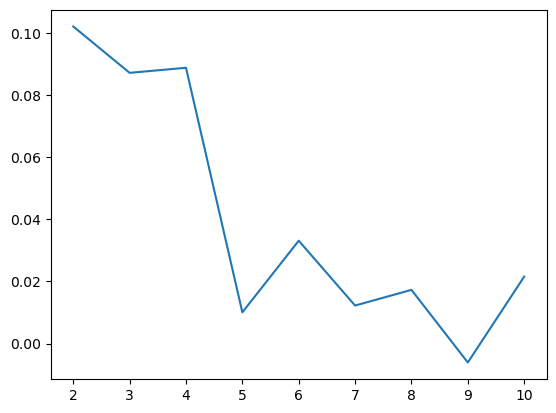

In [80]:
from sklearn.cluster import KMeans

## Applying silhouette_score
from sklearn.metrics import silhouette_score
SS=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features)
    SS.append(silhouette_score(features,kmeans.predict(features)))
    
plt.plot(range(2,11),SS);

In [81]:
kmeans=KMeans(n_clusters=4,random_state=10)
kmeans.fit(features)

KMeans(n_clusters=4, random_state=10)

In [82]:
kmeans.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1])

In [83]:
sust_df=pd.DataFrame(sust_goals,columns=['Data'])

In [84]:
sust_df['Cluster']=kmeans.labels_

In [85]:
sust_df

,Data,Cluster
0,Goal 1. End poverty in all its forms everywher...,1
1,"Goal 2. End hunger, achieve food security and ...",1
2,Goal 3. Ensure healthy lives and promote well-...,1
3,Goal 4. Ensure inclusive and equitable quality...,1
4,Goal 5. Achieve gender equality and empower al...,1
5,Goal 6. Ensure availability and sustainable ma...,0
6,"Goal 7. Ensure access to affordable, reliable,...",1
7,"Goal 8. Promote sustained, inclusive and susta...",1
8,"Goal 9. Build resilient infrastructure, promot...",1
9,Goal 10. Reduce inequality within and among co...,1


## Sentiment Analysis

In [86]:
from textblob import TextBlob

In [87]:
blob1=TextBlob(text_data.text)
blob1.sentiment

Sentiment(polarity=0.06479050098000623, subjectivity=0.38839636024996965)

Overall sentiment of the text is slightly positive with some personal opinions or judgements

In [88]:
blob2=TextBlob(sust_goals[0])
blob2.sentiment

Sentiment(polarity=0.04162210338680927, subjectivity=0.44070112893642294)

In [89]:
blob3=TextBlob(sust_goals[1])
blob3.sentiment

Sentiment(polarity=0.08067287784679089, subjectivity=0.38930641821946177)

In [90]:
blob4=TextBlob(sust_goals[2])
blob4.sentiment

Sentiment(polarity=0.10662915385741474, subjectivity=0.3819268251876946)

Here, it can be observed that most of the goals are slightly positive with a certain personal opinion or judgement.

# Insights:

**1.) With the help of Topic Modelling, it can be observed that the speech talks about global and local impact of COVID19 on various factors such as people, economies, countries, children and their well-being, etc.**

**2.) As most of the goals discuss remedies for sustainable development, they fall in the same cluster.**

**3.) Further, Sentiment Analysis hints that the general sentiment is positive with a certain person opinion of the speaker. The text could not be clearly distinguished between positive and negative as it mostly takes about the need, benefits and solutions of sustainability.**